Helpful Page: https://www.sdss.org/dr12/algorithms/magnitudes/

# Import Module

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Load Data

In [17]:
train = pd.read_csv('../dataset/train.csv', index_col = 0)
test = pd.read_csv('../dataset/test.csv', index_col = 0)
sample_submission = pd.read_csv('../dataset/sample_submission.csv', index_col = 0)

# Define Function

In [18]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values

    return summary

# Check Dataset
제공된 데이터 셋의 피쳐에 대한 설명은 다음과 같다.

- ID: Unique ID
- type: 천체의 분류
- psfMag(Point Spread Function Magnitudes): 먼 천제를 한 점으로 가정하여 측정한 빛의 밝기.
- fiberMag(Fiber Magnitudes): 광섬유를 통과하는 빛의 밝기. 3인치 지름의 광섬유를 사용하여 광스펙트럼을 측정.
- petroMag(Petrosian Magnitudes): 전체의 위치와 거리에 상관없이 빛의 밝기를 비교하기 위한 수치. 은하처럼 뚜렷한 표변이 없는 천체에서는 빛의 밝기를 측정하기 어렵다.
- modelMag(Model Magnitudes): 천체 중심으로부터 특정 거리의 밝기
- fiberID: 관측에 사용된 광섬유의 구분자

## Shape

In [19]:
print("Train Data Shape: {}".format(train.shape))
train.head()

Train Data Shape: (199991, 22)


type  fiberID   psfMag_u   psfMag_g   psfMag_r   psfMag_i  \
id                                                                        
0              QSO      601  23.198224  21.431953  21.314148  21.176553   
1              QSO      788  21.431355  20.708104  20.678850  20.703420   
2              QSO      427  17.851451  16.727898  16.679677  16.694640   
3              QSO      864  20.789900  20.040371  19.926909  19.843840   
4   STAR_RED_DWARF      612  26.454969  23.058767  21.471406  19.504961   

     psfMag_z  fiberMag_u  fiberMag_g  fiberMag_r  ...  petroMag_u  \
id                                                 ...               
0   21.171444   22.581309   21.644453   21.657571  ...   22.504317   
1   20.473229   21.868797   21.029773   20.967054  ...   21.360701   
2   16.641788   18.171890   17.033098   16.999682  ...   17.867253   
3   19.463270   21.039030   20.317165   20.217898  ...   20.433907   
4   18.389096   25.700632   23.629122   21.742750  ...   25.859229   

    petroMag_g  petroMag_r  petroMag_i  petroMag_z  modelMag_u  modelMag_g  \
id                                                                           
0    21.431636   21.478312   21.145409   20.422446   22.749241   21.465534   
1    20.778968   20.889705   20.639812   20.646660   21.492955   20.758527   
2    16.738784   16.688874   16.744210   16.808006   17.818063   16.697434   
3    19.993727   19.985531   19.750917   19.455117   20.770711   20.001699   
4    22.426929   21.673551   19.610012   18.376141   24.877052   23.147993   

    modelMag_r  modelMag_i  modelMag_z  
id                                      
0    21.364187   21.020605   21.147340  
1    20.753925   20.693389   20.512314  
2    16.641249   16.660177   16.688928  
3    19.889798   19.758113   19.552855  
4    21.475342   19.487330   18.375655  

[5 rows x 22 columns]

## Check Missing & Unique Value

In [20]:
resumetable(train)

Dataset Shape: (199991, 22)


Name   dtypes  Missing  Uniques
0         type   object        0       19
1      fiberID    int64        0     1000
2     psfMag_u  float64        0   199991
3     psfMag_g  float64        0   199991
4     psfMag_r  float64        0   199991
5     psfMag_i  float64        0   199991
6     psfMag_z  float64        0   199991
7   fiberMag_u  float64        0   199991
8   fiberMag_g  float64        0   199991
9   fiberMag_r  float64        0   199991
10  fiberMag_i  float64        0   199991
11  fiberMag_z  float64        0   199991
12  petroMag_u  float64        0   199991
13  petroMag_g  float64        0   199991
14  petroMag_r  float64        0   199991
15  petroMag_i  float64        0   199991
16  petroMag_z  float64        0   199991
17  modelMag_u  float64        0   199991
18  modelMag_g  float64        0   199991
19  modelMag_r  float64        0   199991
20  modelMag_i  float64        0   199991
21  modelMag_z  float64        0   199991

fiberID(관측에 사용된 광섬유의 구분자)의 고유값 개수가 1,000개라는 것에 주목할 필요가 있다.

## Summary Statistics

In [21]:
train.describe()

fiberID      psfMag_u       psfMag_g       psfMag_r  \
count  199991.000000  1.999910e+05  199991.000000  199991.000000   
mean      360.830152 -6.750146e+00      18.675373      18.401235   
std       225.305890  1.187678e+04     155.423024     127.128078   
min         1.000000 -5.310802e+06  -40022.466071  -27184.795793   
25%       174.000000  1.965259e+01      18.701180      18.048572   
50%       349.000000  2.087136e+01      19.904235      19.454492   
75%       526.000000  2.216043e+01      21.150297      20.515936   
max      1000.000000  1.877392e+04    3538.984910    3048.110913   

            psfMag_i       psfMag_z    fiberMag_u     fiberMag_g  \
count  199991.000000  199991.000000  1.999910e+05  199991.000000   
mean       18.043495      17.663526  1.084986e+01      19.072693   
std       116.622194     123.735298  4.172116e+03     749.256162   
min    -26566.310827  -24878.828280 -1.864766e+06 -215882.917191   
25%        17.747663      17.425523  1.994040e+01      18.902851   
50%        19.043895      18.611799  2.104910e+01      20.069038   
75%        20.073528      19.883760  2.233754e+01      21.385830   
max      4835.218639    9823.740407  4.870154e+03  248077.513380   

          fiberMag_r     fiberMag_i  ...     petroMag_u     petroMag_g  \
count  199991.000000  199991.000000  ...  199991.000000  199991.000000   
mean       19.134483      18.183331  ...      21.837903      18.454136   
std        90.049058     122.378972  ...     789.472333     154.376277   
min    -21802.656144  -20208.516262  ...  -24463.431833  -25958.752324   
25%        18.259352      17.903615  ...      19.247795      18.113933   
50%        19.631419      19.188763  ...      20.366848      19.586559   
75%        20.773911      20.331419  ...      21.797480      21.004397   
max     12084.735440    8059.638535  ...  298771.019041   12139.815877   

          petroMag_r     petroMag_i     petroMag_z     modelMag_u  \
count  199991.000000  199991.000000  199991.000000  199991.000000   
mean       18.481525      17.686617      17.699207      20.110991   
std        97.240448     145.730872     142.691880     122.299062   
min    -23948.588523  -40438.184078  -30070.729379  -26236.578659   
25%        17.479794      17.050294      16.804705      19.266214   
50%        19.182789      18.693370      18.174592      20.406840   
75%        20.457491      20.019112      19.807652      21.992898   
max      7003.136546    9772.190537   17403.789263   14488.251976   

          modelMag_g     modelMag_r     modelMag_i     modelMag_z  
count  199991.000000  199991.000000  199991.000000  199991.000000  
mean       18.544375      18.181544      17.692395      17.189281  
std       161.728183     133.984475     131.183416     133.685138  
min    -36902.402336  -36439.638493  -38969.416822  -26050.710196  
25%        18.076120      17.423425      16.977671      16.705774  
50%        19.547674      19.143156      18.641756      18.100997  
75%        20.962386      20.408140      19.968846      19.819554  
max     10582.058590   12237.951703    4062.499371    7420.534172  

[8 rows x 21 columns]

# Explanatory Data Analysis

## Lable(type)

In [22]:
print("Num of Label Type: {}({})".format(train['type'].unique(), train['type'].nunique()))

Num of Label Type: ['QSO' 'STAR_RED_DWARF' 'SERENDIPITY_BLUE' 'STAR_BHB' 'STAR_CATY_VAR'
 'SERENDIPITY_DISTANT' 'GALAXY' 'SPECTROPHOTO_STD' 'REDDEN_STD' 'ROSAT_D'
 'STAR_WHITE_DWARF' 'SERENDIPITY_RED' 'STAR_CARBON' 'SERENDIPITY_FIRST'
 'STAR_BROWN_DWARF' 'STAR_SUB_DWARF' 'SKY' 'SERENDIPITY_MANUAL' 'STAR_PN'](19)


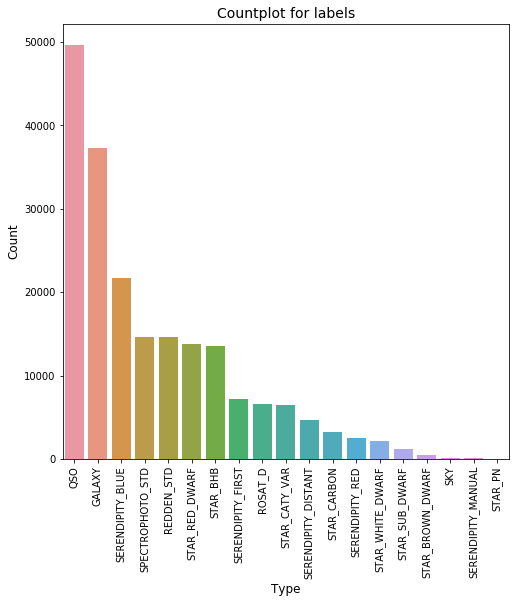

In [23]:
plt.figure(figsize = (8,8))

ax = sns.countplot(train['type'], order = train['type'].value_counts().index)

ax.set_title("Countplot for labels",fontsize = 14)
ax.set_xlabel('Type', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.show()

### QSO(Quasar)

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Artist%27s_rendering_ULAS_J1120%2B0641.jpg/450px-Artist%27s_rendering_ULAS_J1120%2B0641.jpg>

'준항성체'라고 불리우며, 블랙홀이 주변 물질을 집어삼키는 에너지에 의해 형성되는 거대 발광체이다.

중심에는 태양의 질량 10억 배나 되는 매우 무거운 블랙홀이 자리를 잡고 있고 그 주위에는 원반이 둘러싸고 있다. 원반의 물질이 회전하며 블랙홀로 떨어지며 물질의 중력 에너지가 빛 에너지로 바뀌변서 거대한 양의 빛이 발생한다.

지금까지 우주에서 발견된 천체들 중 가장 밝고, 강력하며, 활동적인 천체이다. 따라서 지구에서 관측할 수 있는 가장 먼 거리에 있는 천체로, 강한 에너지를 방출하는 <b>활동은하</b>이다. 

매우 큰 <b>적색편이</b>값을 갖는다는 특징을 보인다.

In [24]:
train_qso = train.loc[train['type'] == 'QSO']
print("Num of Quasar Observation : {}".format(train_qso.shape[0]))
print("Pct of Quasar Observation : {}%".format(round(train_qso.shape[0] / train.shape[0] * 100,2)))

Num of Quasar Observation : 49680
Pct of Quasar Observation : 24.84%


In [73]:
def VisFeature(data, method = 'hist', scale = None):
    
    
    if method == 'hist':
        data = data.drop(columns = 'type')

        f = plt.figure(figsize = (30,30))
        
        for i, col in enumerate(data.columns):
            f.add_subplot(6,4,i+1)
            sns.distplot(data[col])
            plt.title(col, fontsize = 14)
            plt.xlabel(' ')
            plt.ylabel('Density', fontsize = 12)
    
    if method == 'boxplot':
        df = data.copy()
        df['Type'] = data['type']
        df.drop(columns = 'type',inplace = True)
        
        f = plt.figure(figsize = (15,80))
        
        for i, col in enumerate(df.drop(columns = 'Type').columns):
            f.add_subplot(22, 1, i+1)
            ax = sns.boxplot(x = 'Type', y = col, data = df)
            
            if scale == 'log':
                ax.set_yscale("log")
                ax.set_ylabel("log({})".format(col))
                
            ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
            f.subplots_adjust(hspace = 0.9)
            

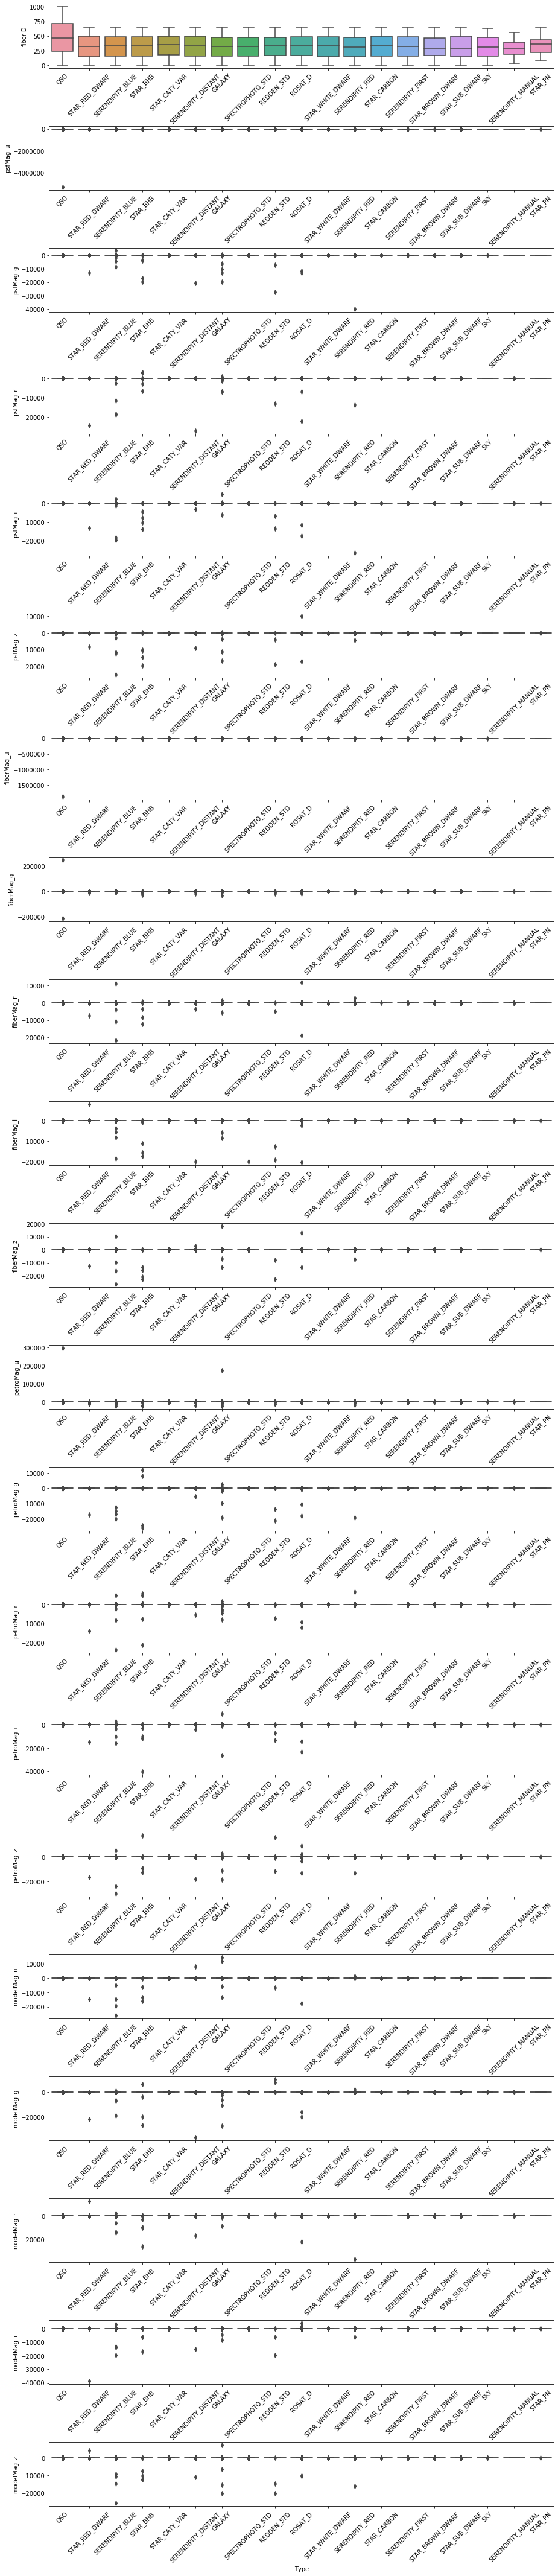

In [69]:
VisFeature(train, method = 'boxplot')

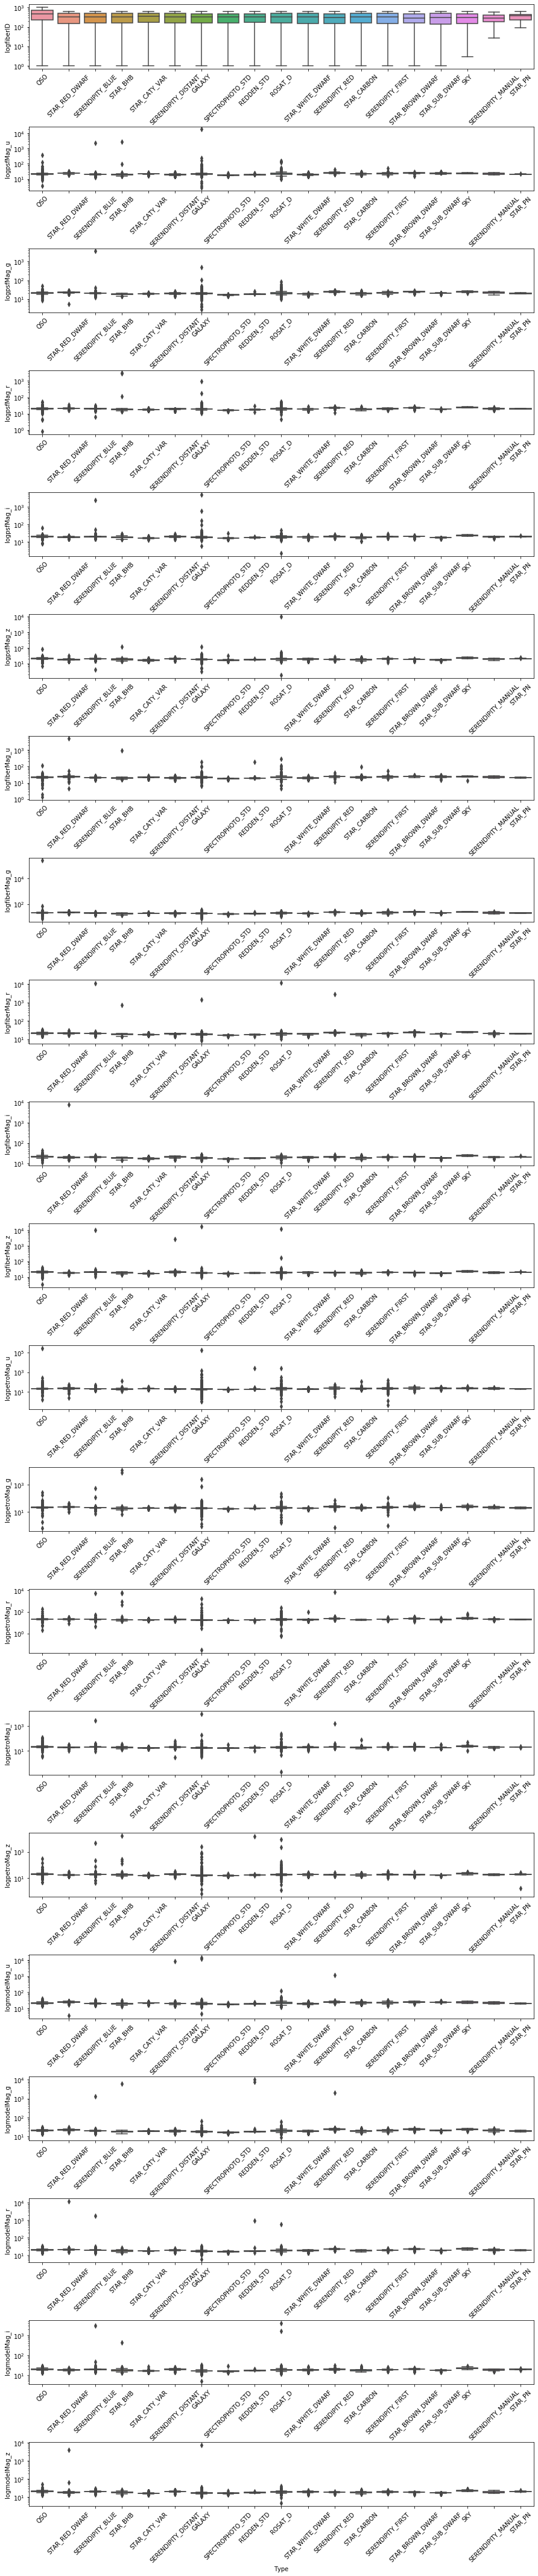

In [72]:
VisFeature(train, method = 'boxplot', scale = "log")

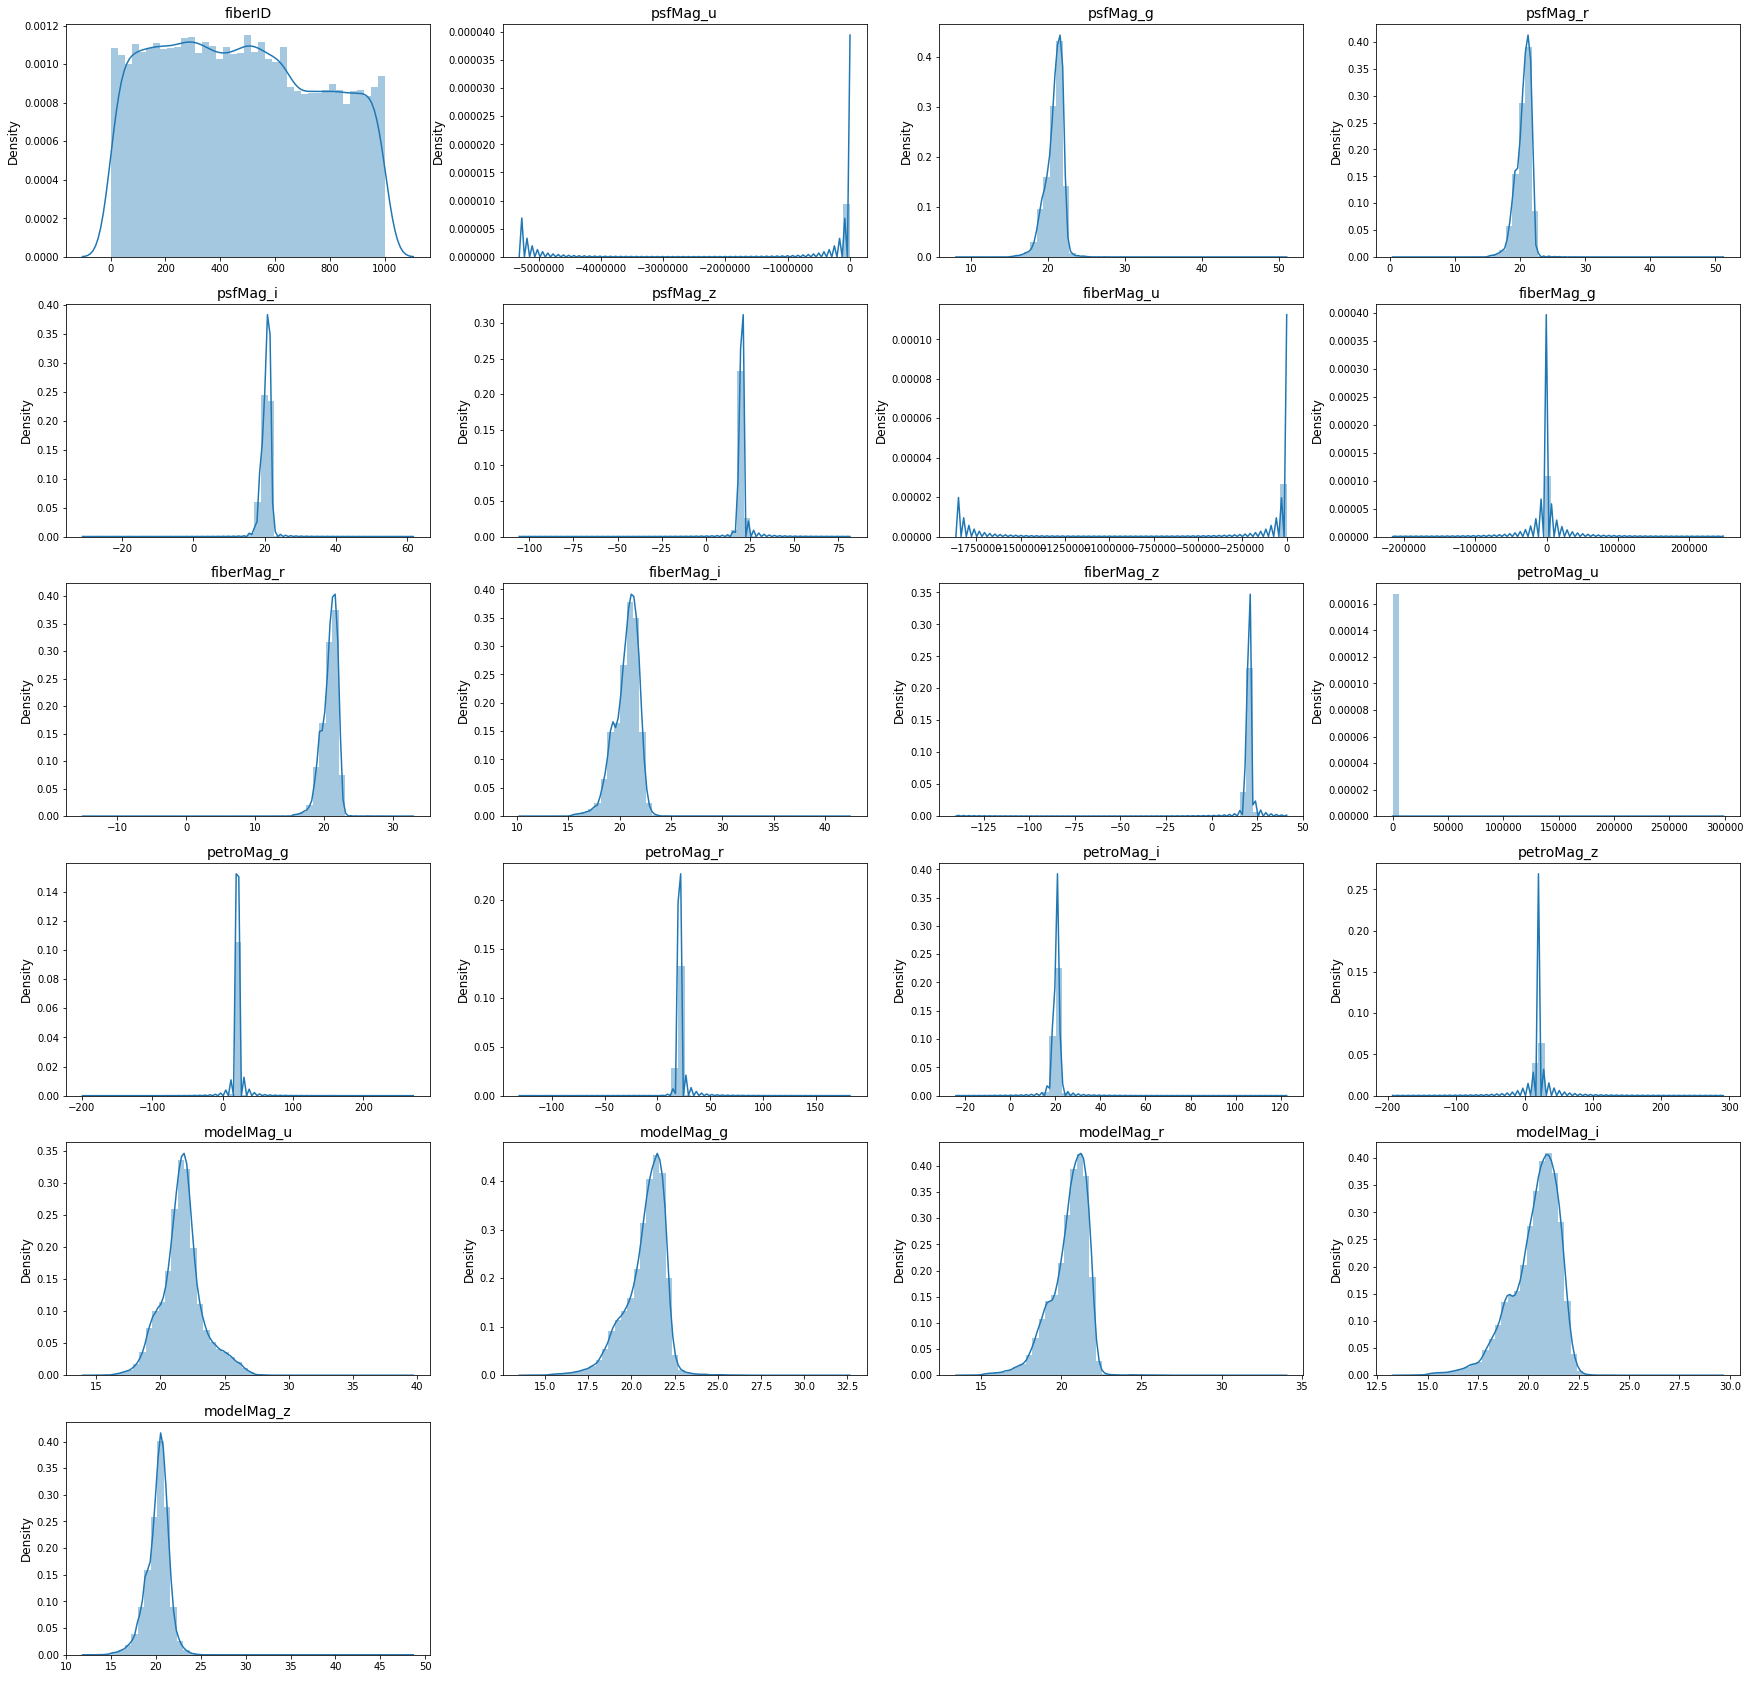

In [115]:
VisFeature(train_qso)

### STAR_RED_DWARF

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/RedDwarfNASA.jpg/450px-RedDwarfNASA.jpg>

'적색왜성'이라고도 불린다. 상대적으로 차가우며 태양의 0.081-0.5배 정도의 가벼운 질량을 지닌 주계열성을 부르는 말이다. 

우주에 존재하는 별들의 약 90퍼센트가 적색왜성으로 알려져있으나, 낮은 광도 때문에 개개의 적색왜성을 관측하기 쉽지않다. 실제로 지구에서 육간으로 관찰할 수 있는 적색왜성은 없으며 태양으로 부터 가장 가까운 별은 '프록시마 센타우리'이다.

적색왜성은 아주 느리게 진화하며 거의 일정한 광도와 등급 형태를 가지고있다. 

In [121]:
train_std = train.loc[train['type'] == 'STAR_RED_DWARF']
print("Num of Star Red Dwarf Observation : {}".format(train_std.shape[0]))
print("Pct of Star Red Dwarf Observation : {}%".format(round(train_std.shape[0] / train.shape[0] * 100,2)))

Num of Star Red Dwarf Observation : 13750
Pct of Star Red Dwarf Observation : 6.88%


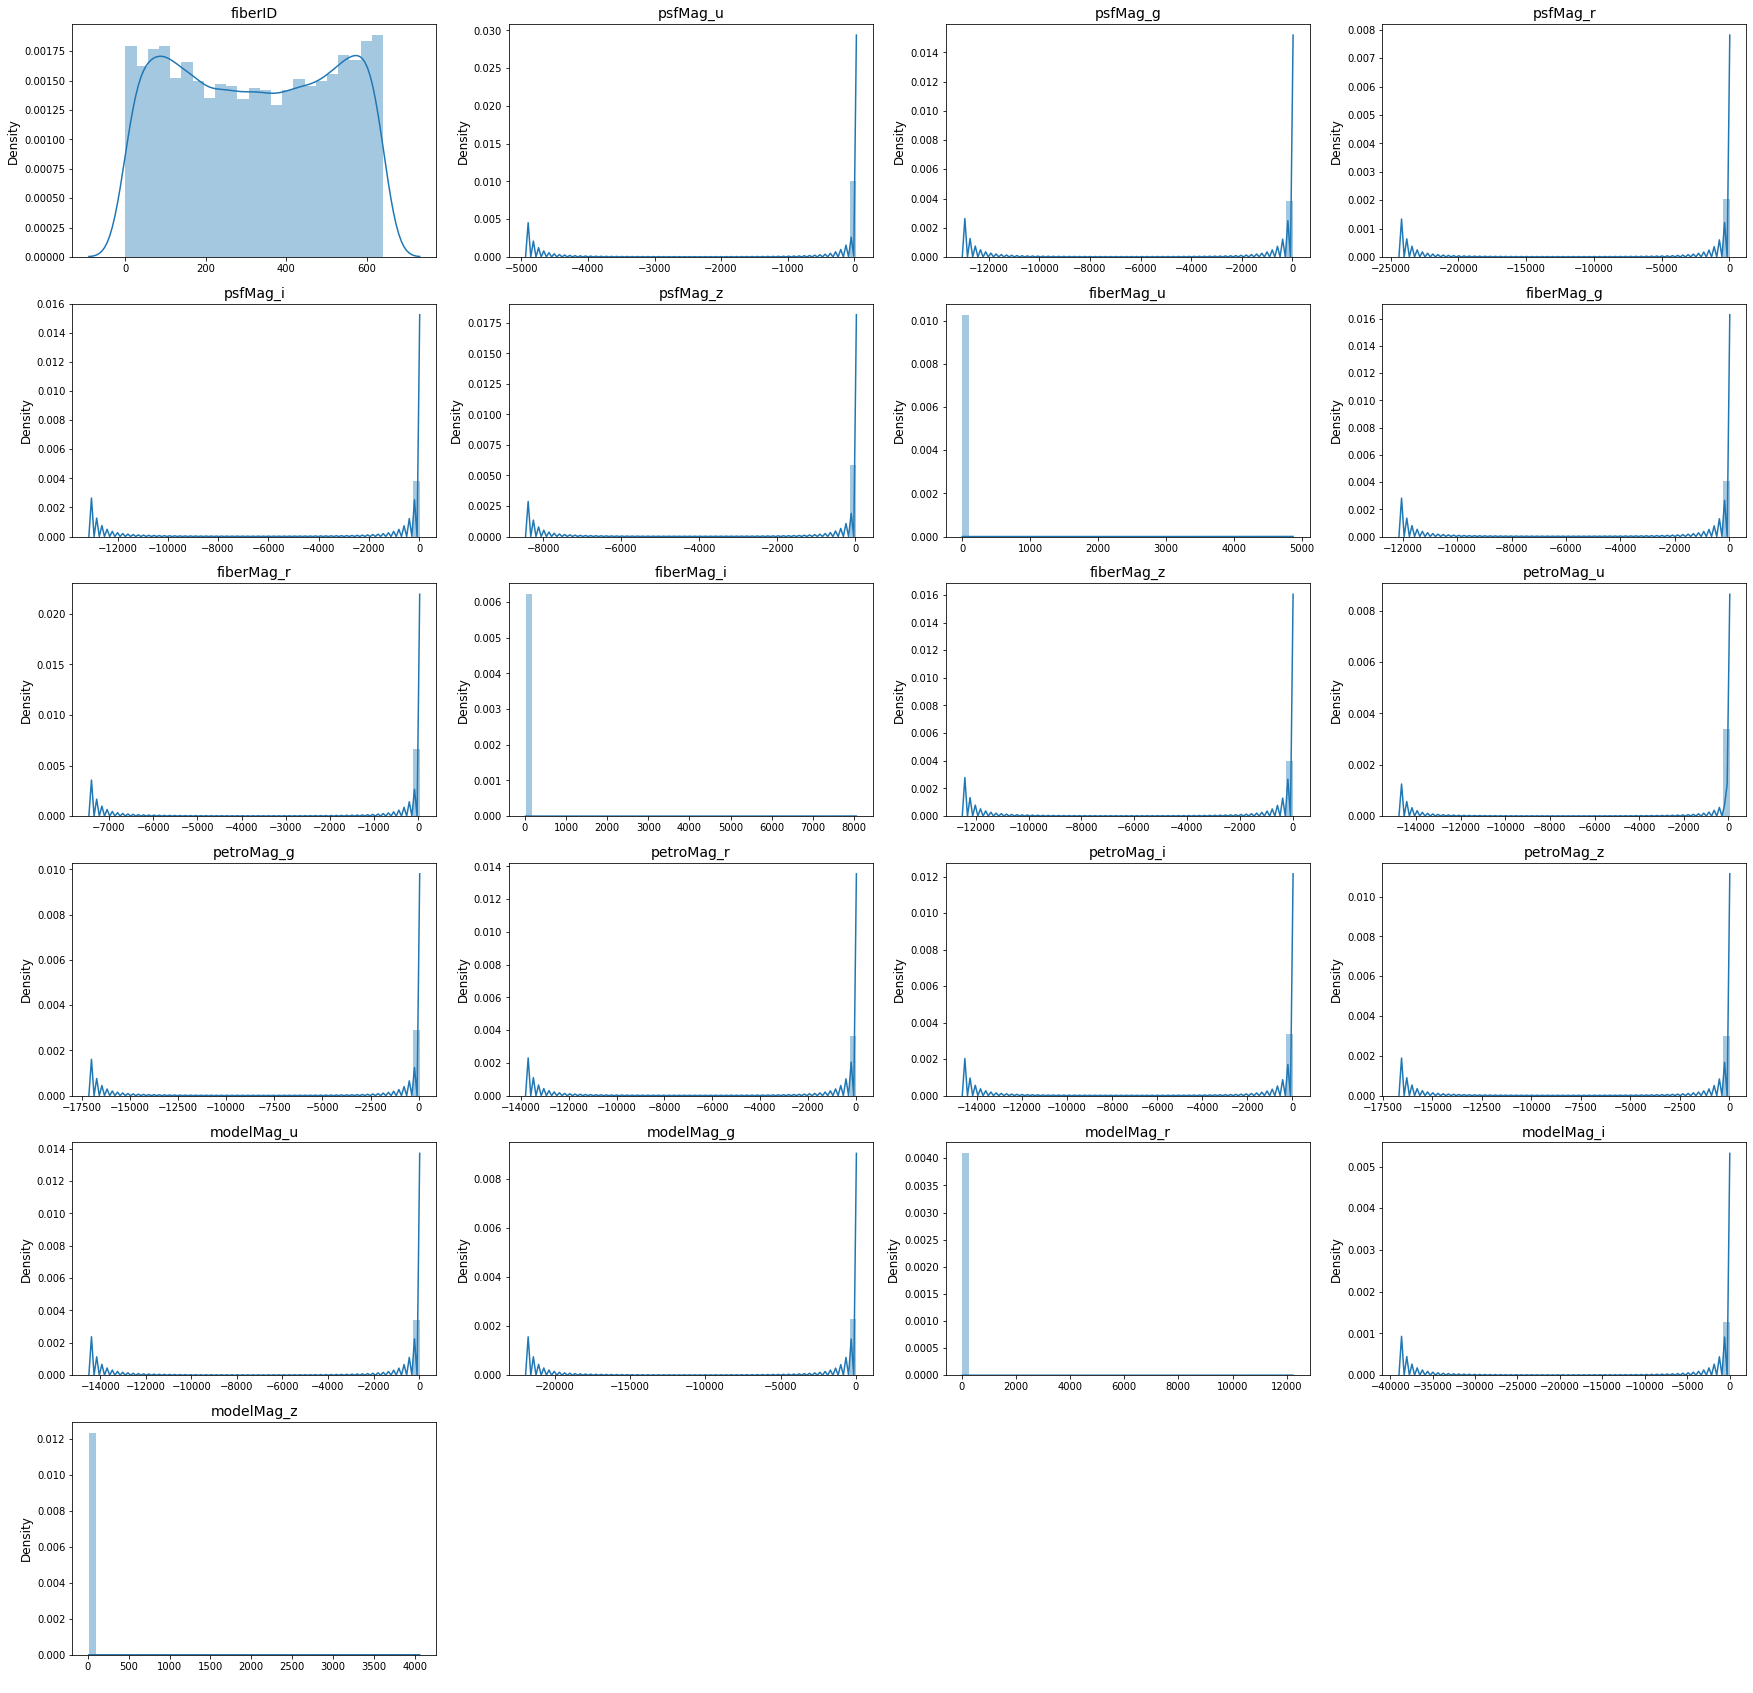

In [122]:
VisFeature(train_std)

### SERENDIPITY_BLUE
알 수 없음. TO-DO

In [123]:
train_sb = train.loc[train['type'] == 'SERENDIPITY_BLUE']
print("Num of SERENDIPTY BLUE Observation : {}".format(train_sb.shape[0]))
print("Pct of SERENDIPTY BLUE Observation : {}%".format(round(train_sb.shape[0] / train.shape[0] * 100,2)))

Num of SERENDIPTY BLUE Observation : 21760
Pct of SERENDIPTY BLUE Observation : 10.88%


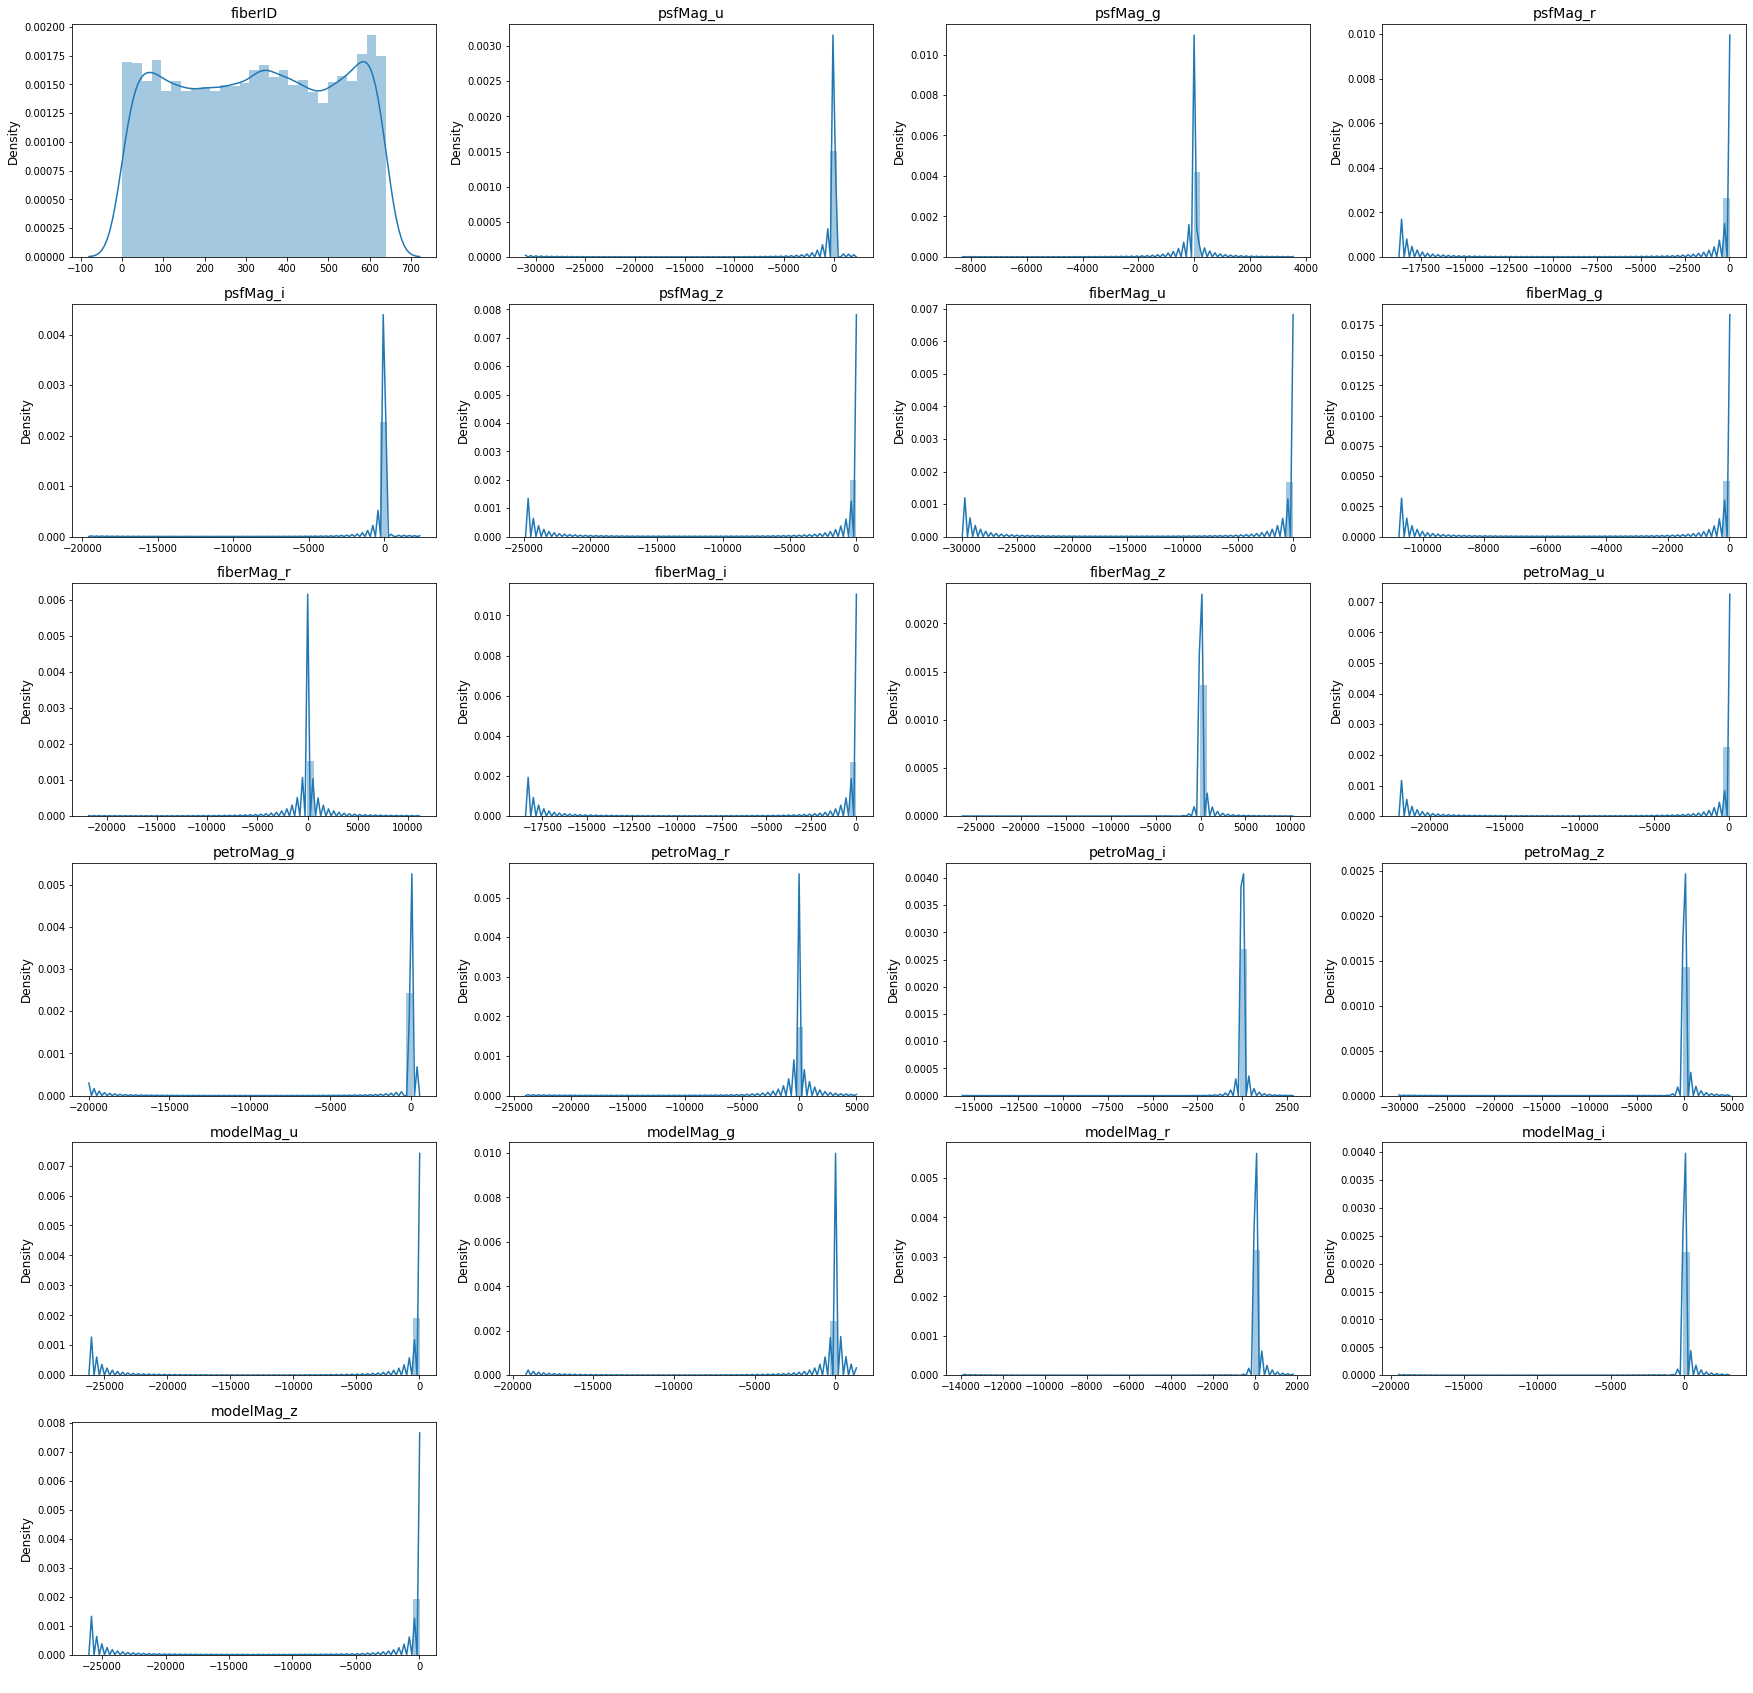

In [124]:
VisFeature(train_sb)

### STAR_BHB(Horizontal Branch)

'수평거성열'이라고 불리며, 태양과 비슷한 질량의 별에서 적색거성가지를 뒤따르는 항성진화의 한 단계이다. 

적색거성가지의 꼭대기에서 발생하는 핼륨핵 섬광은 항성구조의 상당한 변화를 야기한다. 그 결과, 광도의 전반적인 감소와 표면온도의 상승이 이루어진다. 

In [127]:
train_bh = train.loc[train['type'] == 'STAR_BHB']
print("Num of Horizontal Branch Observation : {}".format(train_bh.shape[0]))
print("Pct of Horizontal Branch Observation : {}%".format(round(train_bh.shape[0] / train.shape[0] * 100,2)))

Num of Horizontal Branch Observation : 13500
Pct of Horizontal Branch Observation : 6.75%


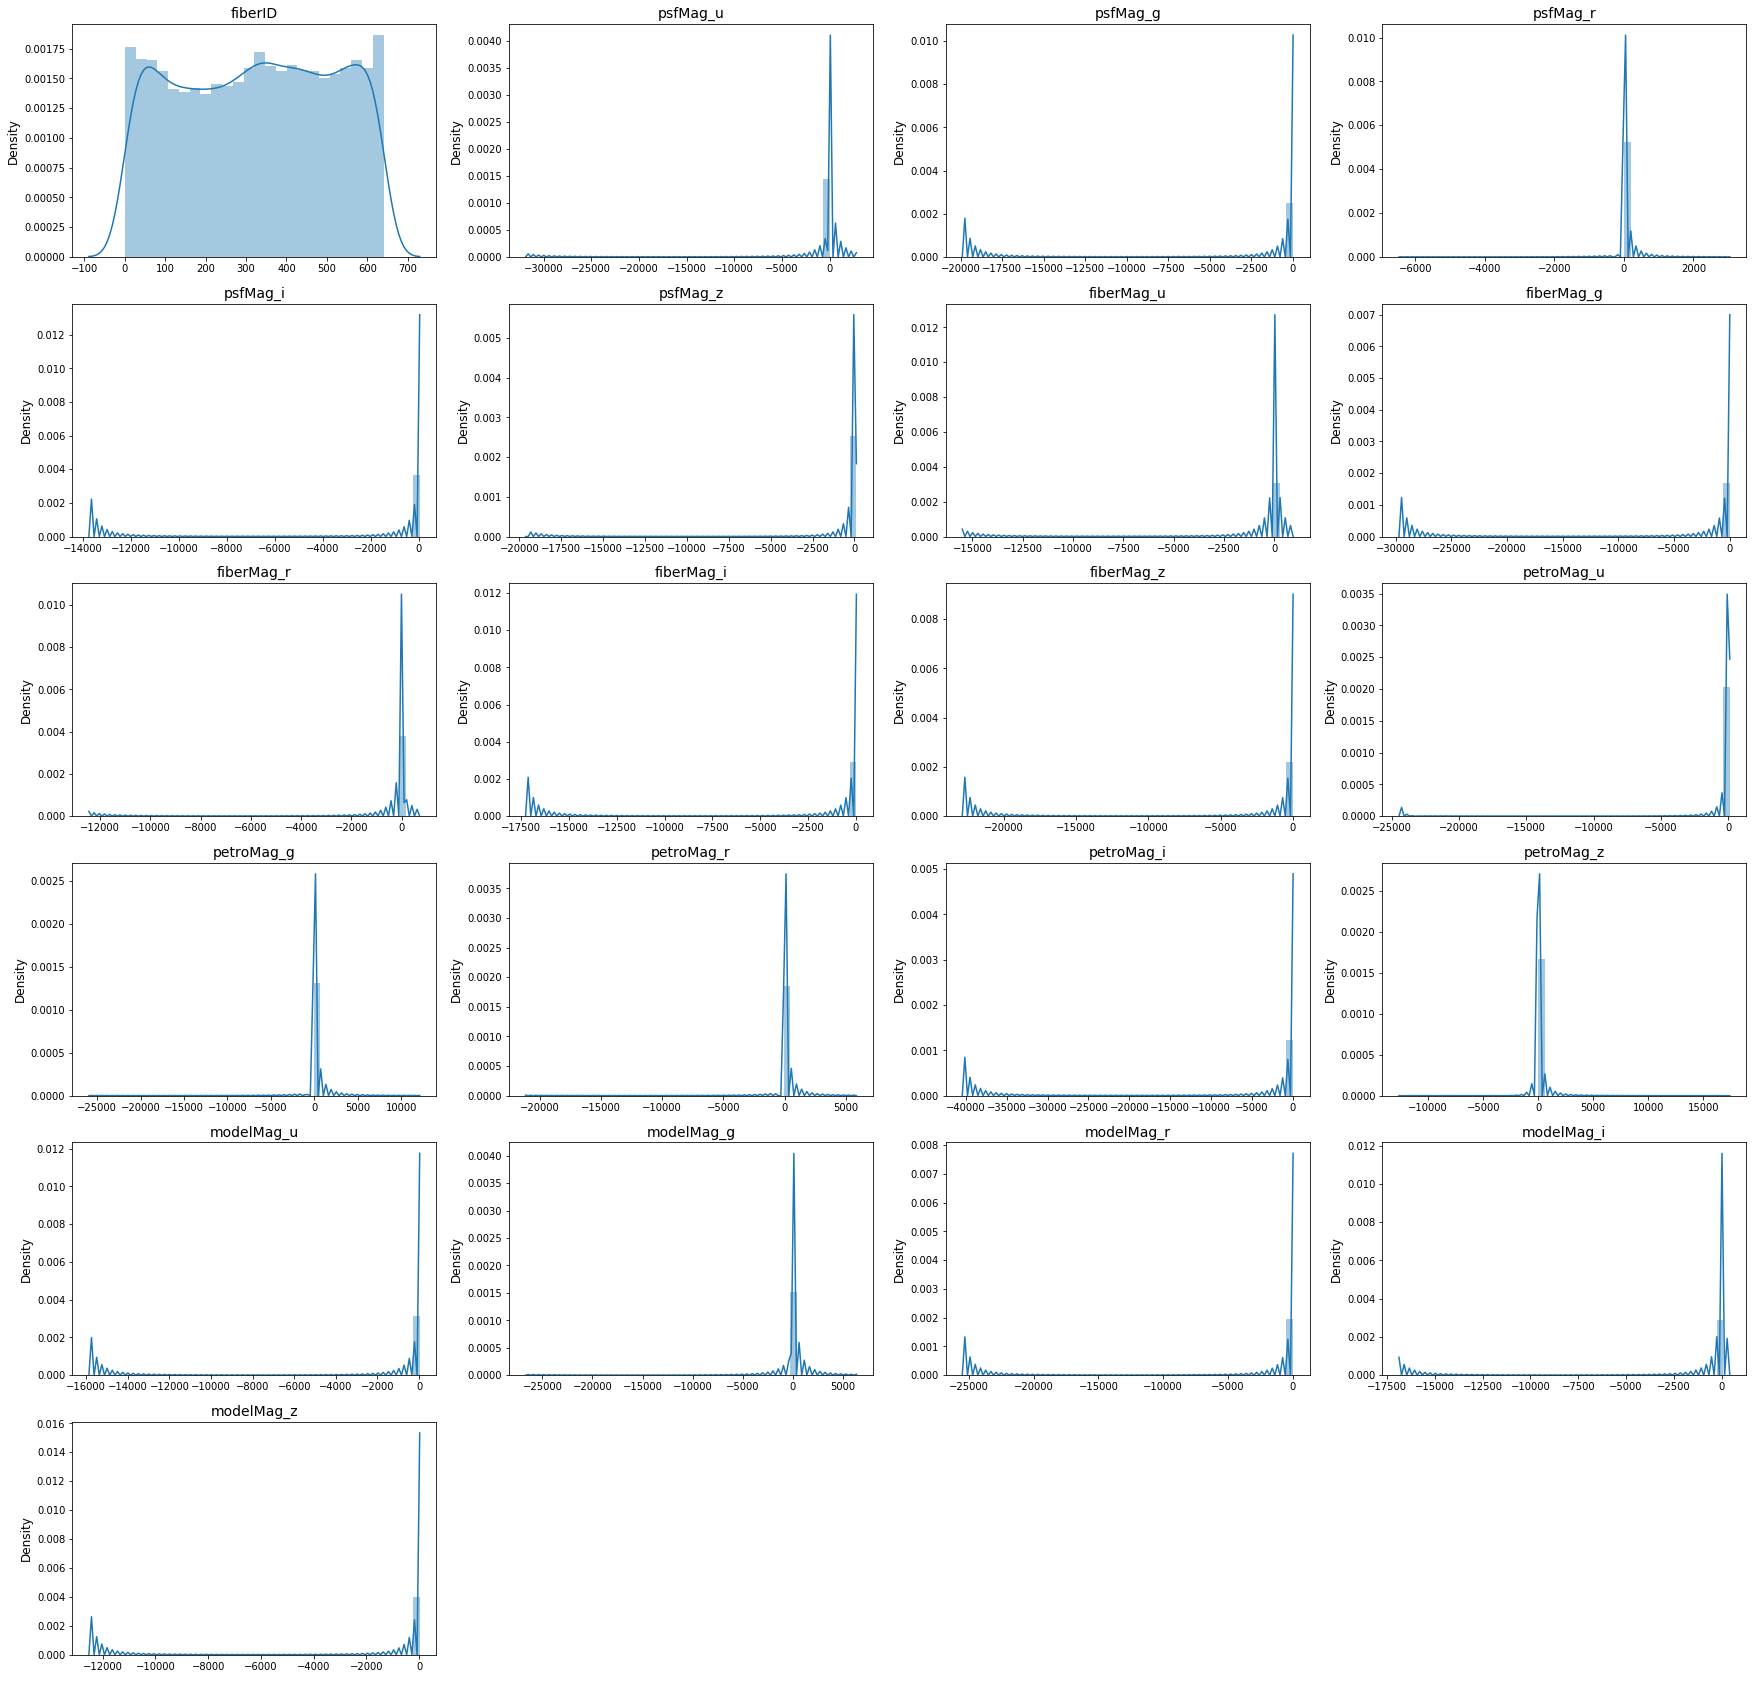

In [126]:
VisFeature(train_bh)

### SERENDIPITY_DISTANT
알 수 없음. TO-DO

In [128]:
train_sd = train.loc[train['type'] == 'SERENDIPITY_DISTANT']
print("Num of SERENDIPITY DISTANT Observation : {}".format(train_sd.shape[0]))
print("Pct of SERENDIPITY DISTANT Observation : {}%".format(round(train_sd.shape[0] / train.shape[0] * 100,2)))

Num of SERENDIPITY DISTANT Observation : 4654
Pct of SERENDIPITY DISTANT Observation : 2.33%


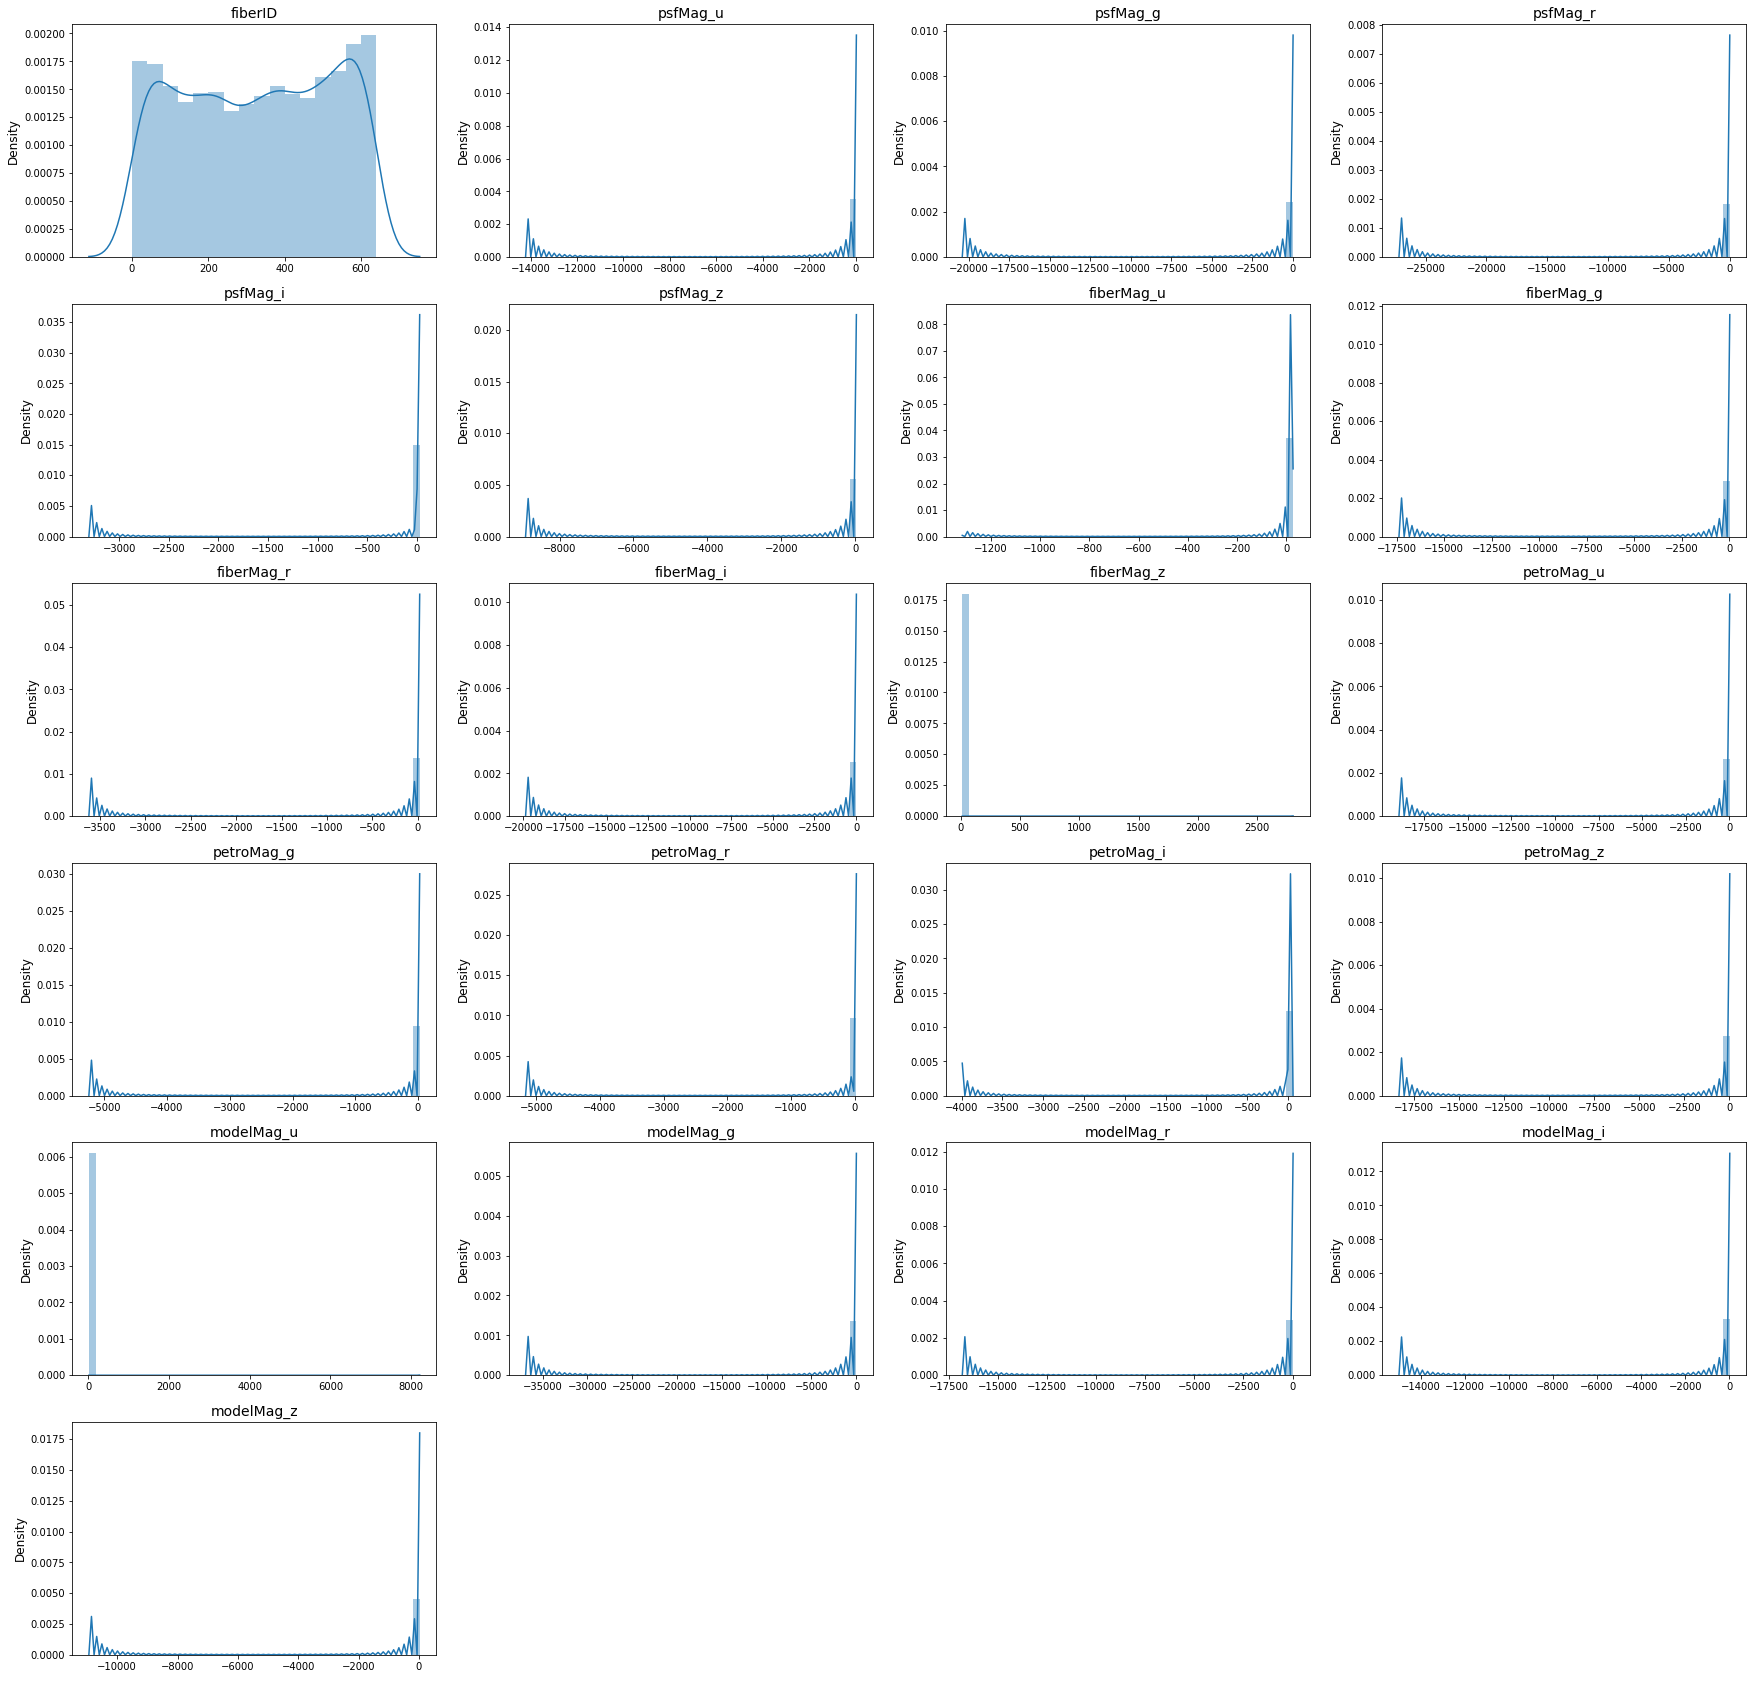

In [129]:
VisFeature(train_sd)

### GALAXY
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/NGC_4414_%28NASA-med%29.jpg/450px-NGC_4414_%28NASA-med%29.jpg>

'은하'라고 불리며, 항성, 밀집성, 성간 물질, 암흑 물질 등이 중력에 의해 묶여져 이루는 거대한 천체들의 무리이다.

수많은 항성계, 성단, 성간운들이 존재하며, 이 사이 공간은 가스, 먼지, 우주선들로 이루어진 성간물질들로 채워져 있다. 

In [131]:
train_galaxy = train.loc[train['type'] == 'GALAXY']
print("Num of Galaxy Observation : {}".format(train_galaxy.shape[0]))
print("Pct of Galaxy Observation : {}%".format(round(train_galaxy.shape[0] / train.shape[0] * 100,2)))

Num of Galaxy Observation : 37347
Pct of Galaxy Observation : 18.67%


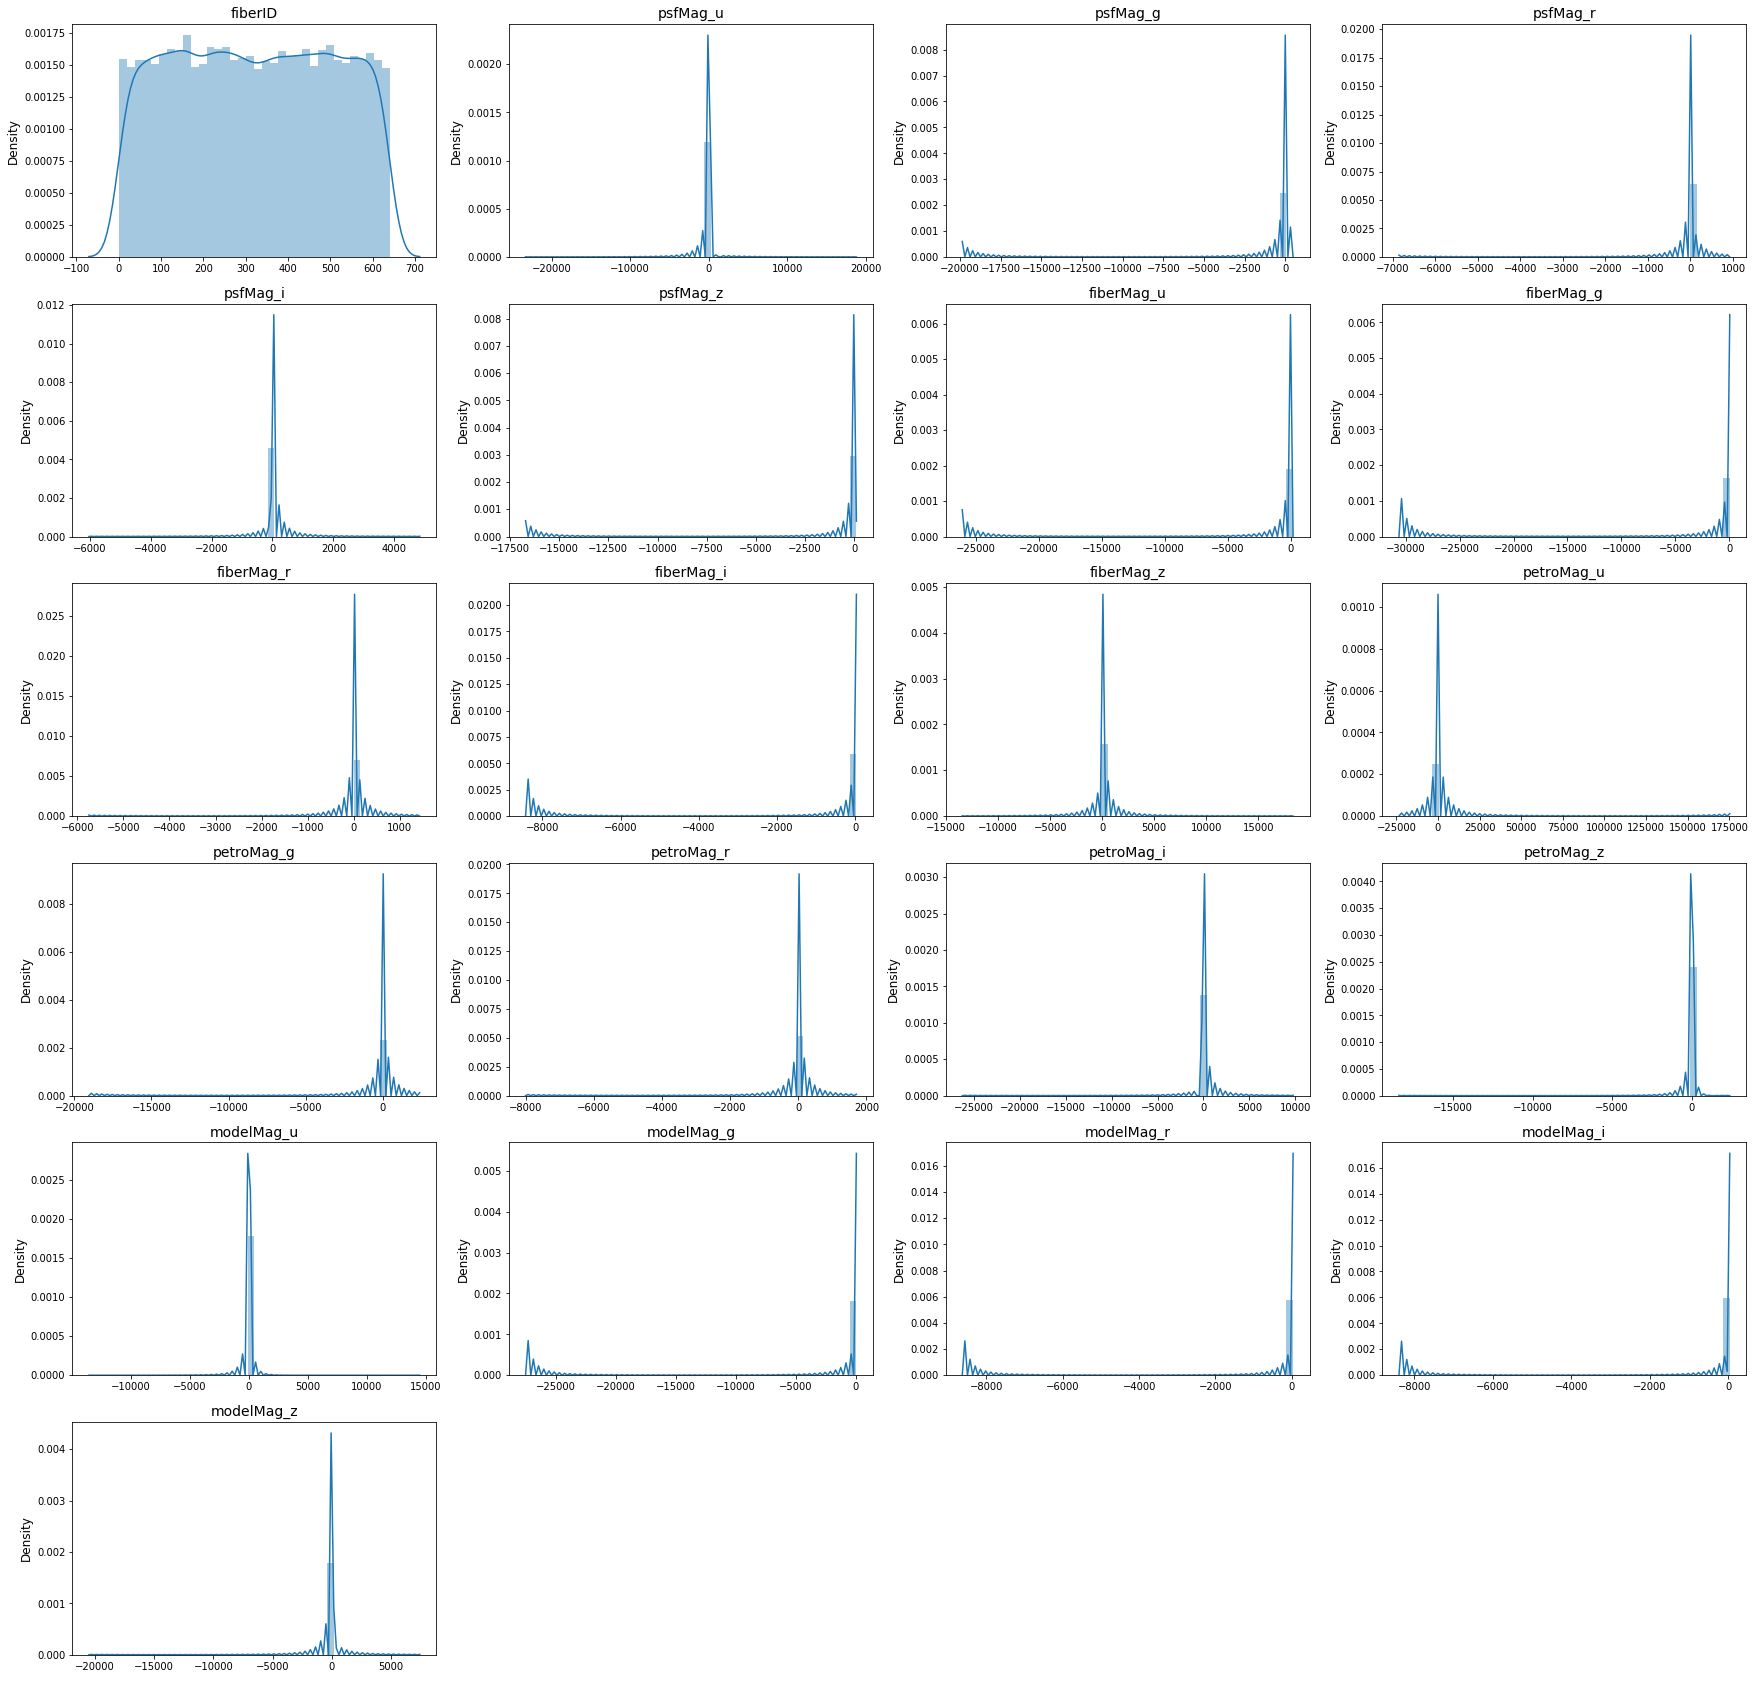

In [132]:
VisFeature(train_galaxy)

### SPECTROPHOTO_STD

<img src=https://www.scienceall.com/nas/image/201303/DP311_23.jpg width="500">

'분광 쌍성'으로 예상되는 라벨이다. 

육안이나 망원경으로 볼 때 마치 하나의 별처럼 보이지만, 실제로는 두 개의 별이 가까이 붙어있는 상성을 말한다. 

분광쌍성의 각 구성원은 질량중심을 따라 공전하며 관측자의 시야에서 멀어졌다가 가까워졌다가를 반복한다. 관측자에게서 멀어지면 붉은 색이, 가까워지면 푸른 색이 나타난다.

In [133]:
train_ss = train.loc[train['type'] == 'SPECTROPHOTO_STD']
print("Num of SPECTROPHOTO STD Observation : {}".format(train_ss.shape[0]))
print("Pct of SPECTROPHOTO STD Observation : {}%".format(round(train_ss.shape[0] / train.shape[0] * 100,2)))

Num of SPECTROPHOTO STD Observation : 14630
Pct of SPECTROPHOTO STD Observation : 7.32%


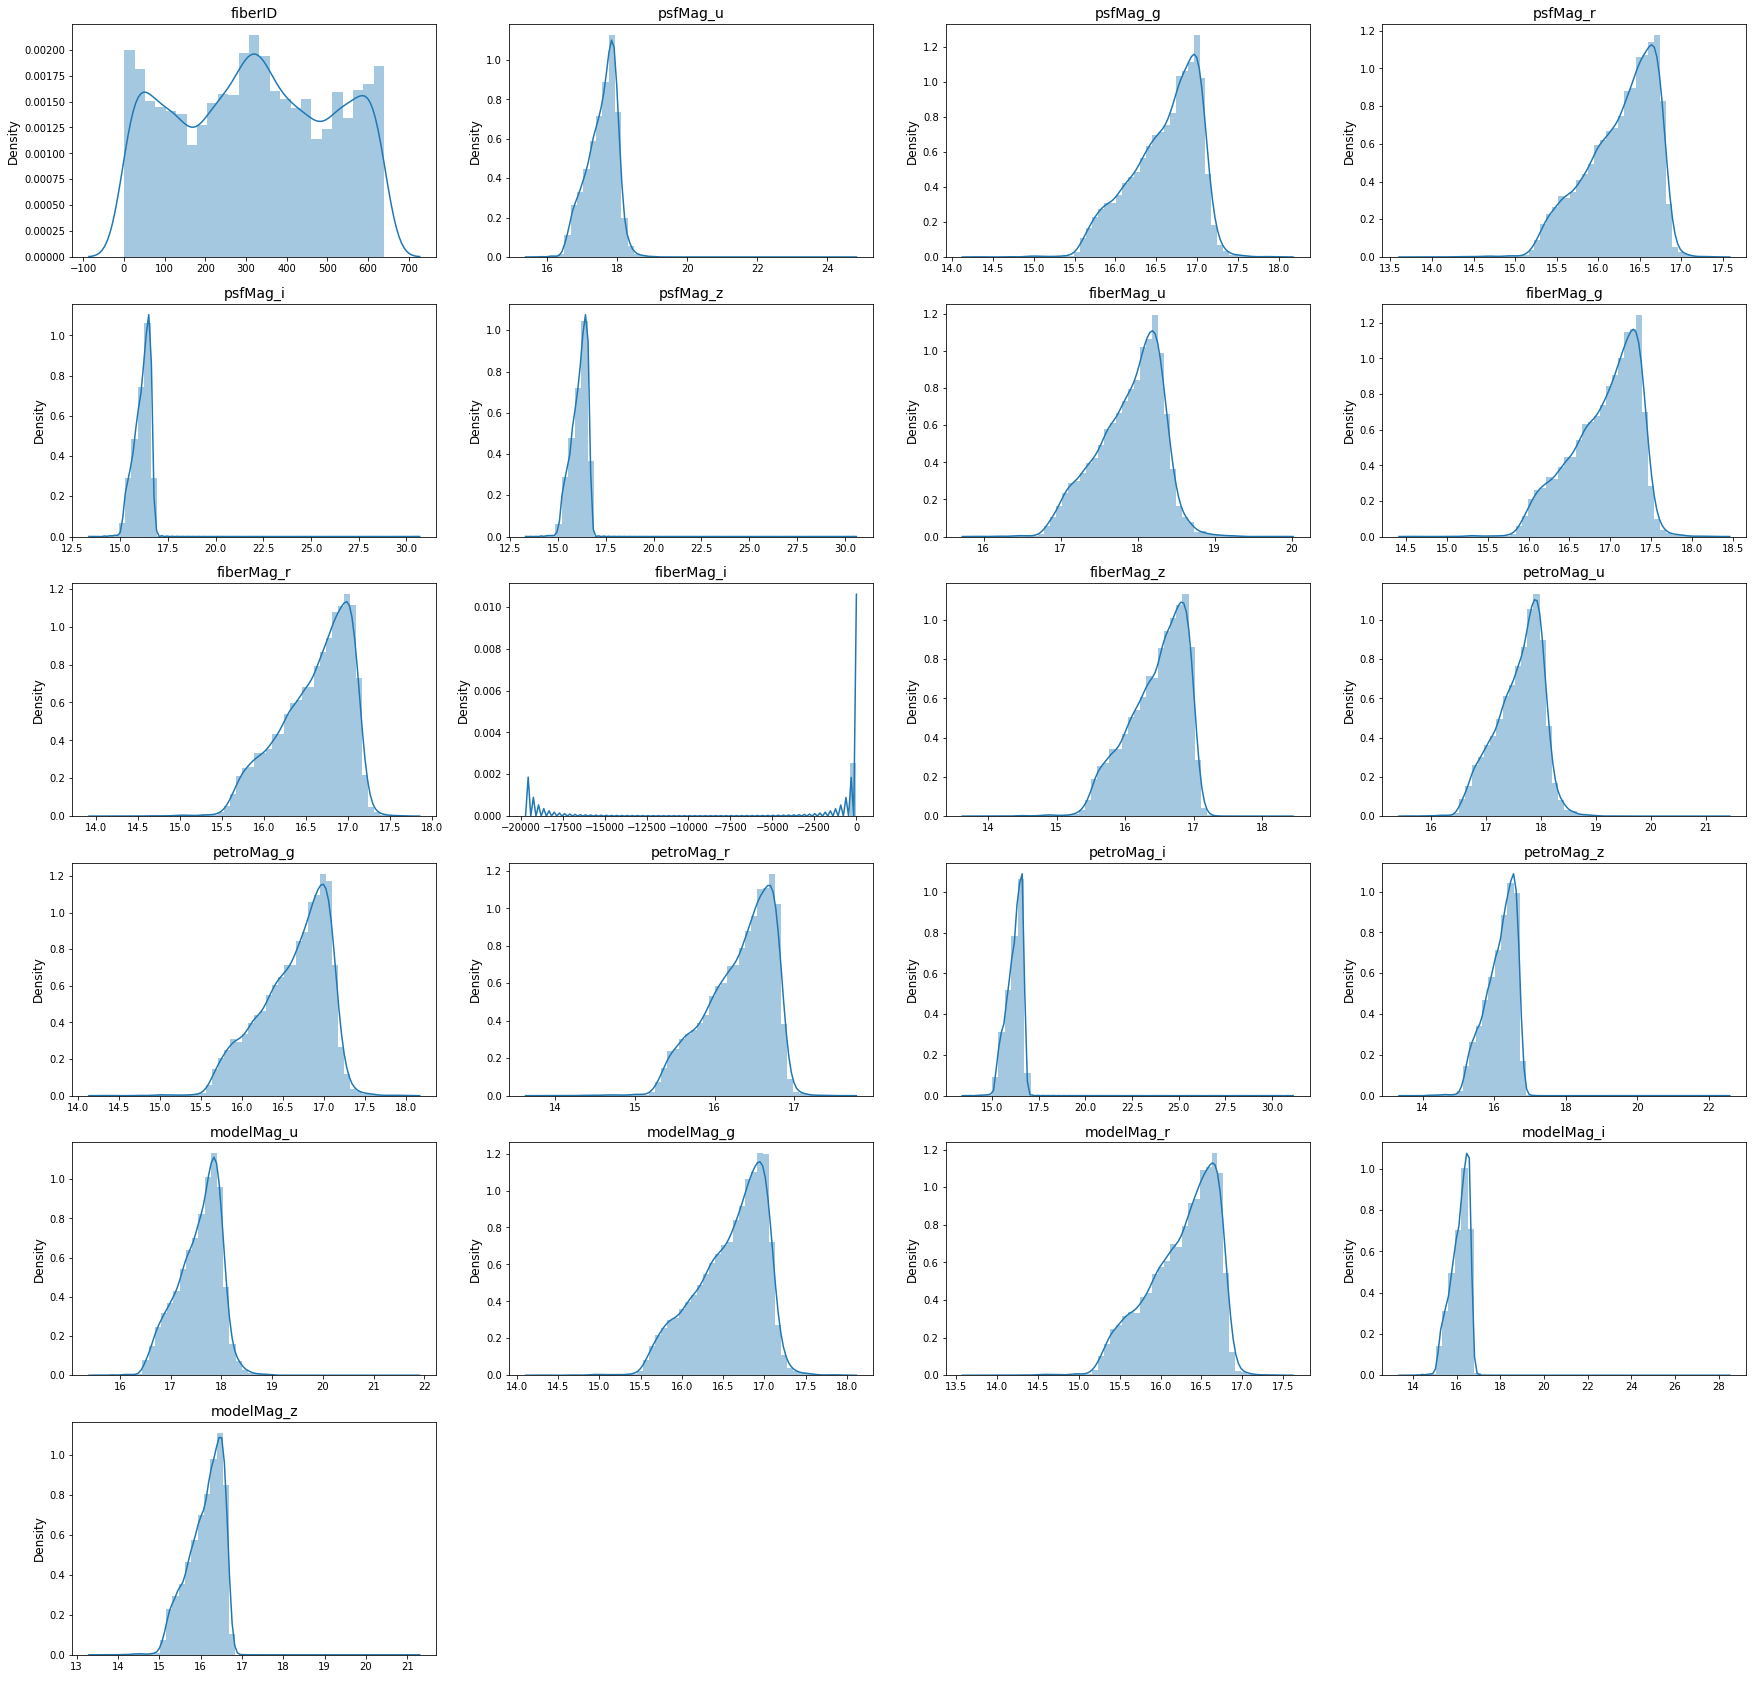

In [134]:
VisFeature(train_ss)

### REDDEN_STD 
알 수 없음. TO-DO

In [135]:
train_rt = train.loc[train['type'] == 'REDDEN_STD']
print("Num of REDDEN STD Observation : {}".format(train_rt.shape[0]))
print("Pct of REDDEN STD Observation : {}%".format(round(train_rt.shape[0] / train.shape[0] * 100,2)))

Num of REDDEN STD Observation : 14618
Pct of REDDEN STD Observation : 7.31%


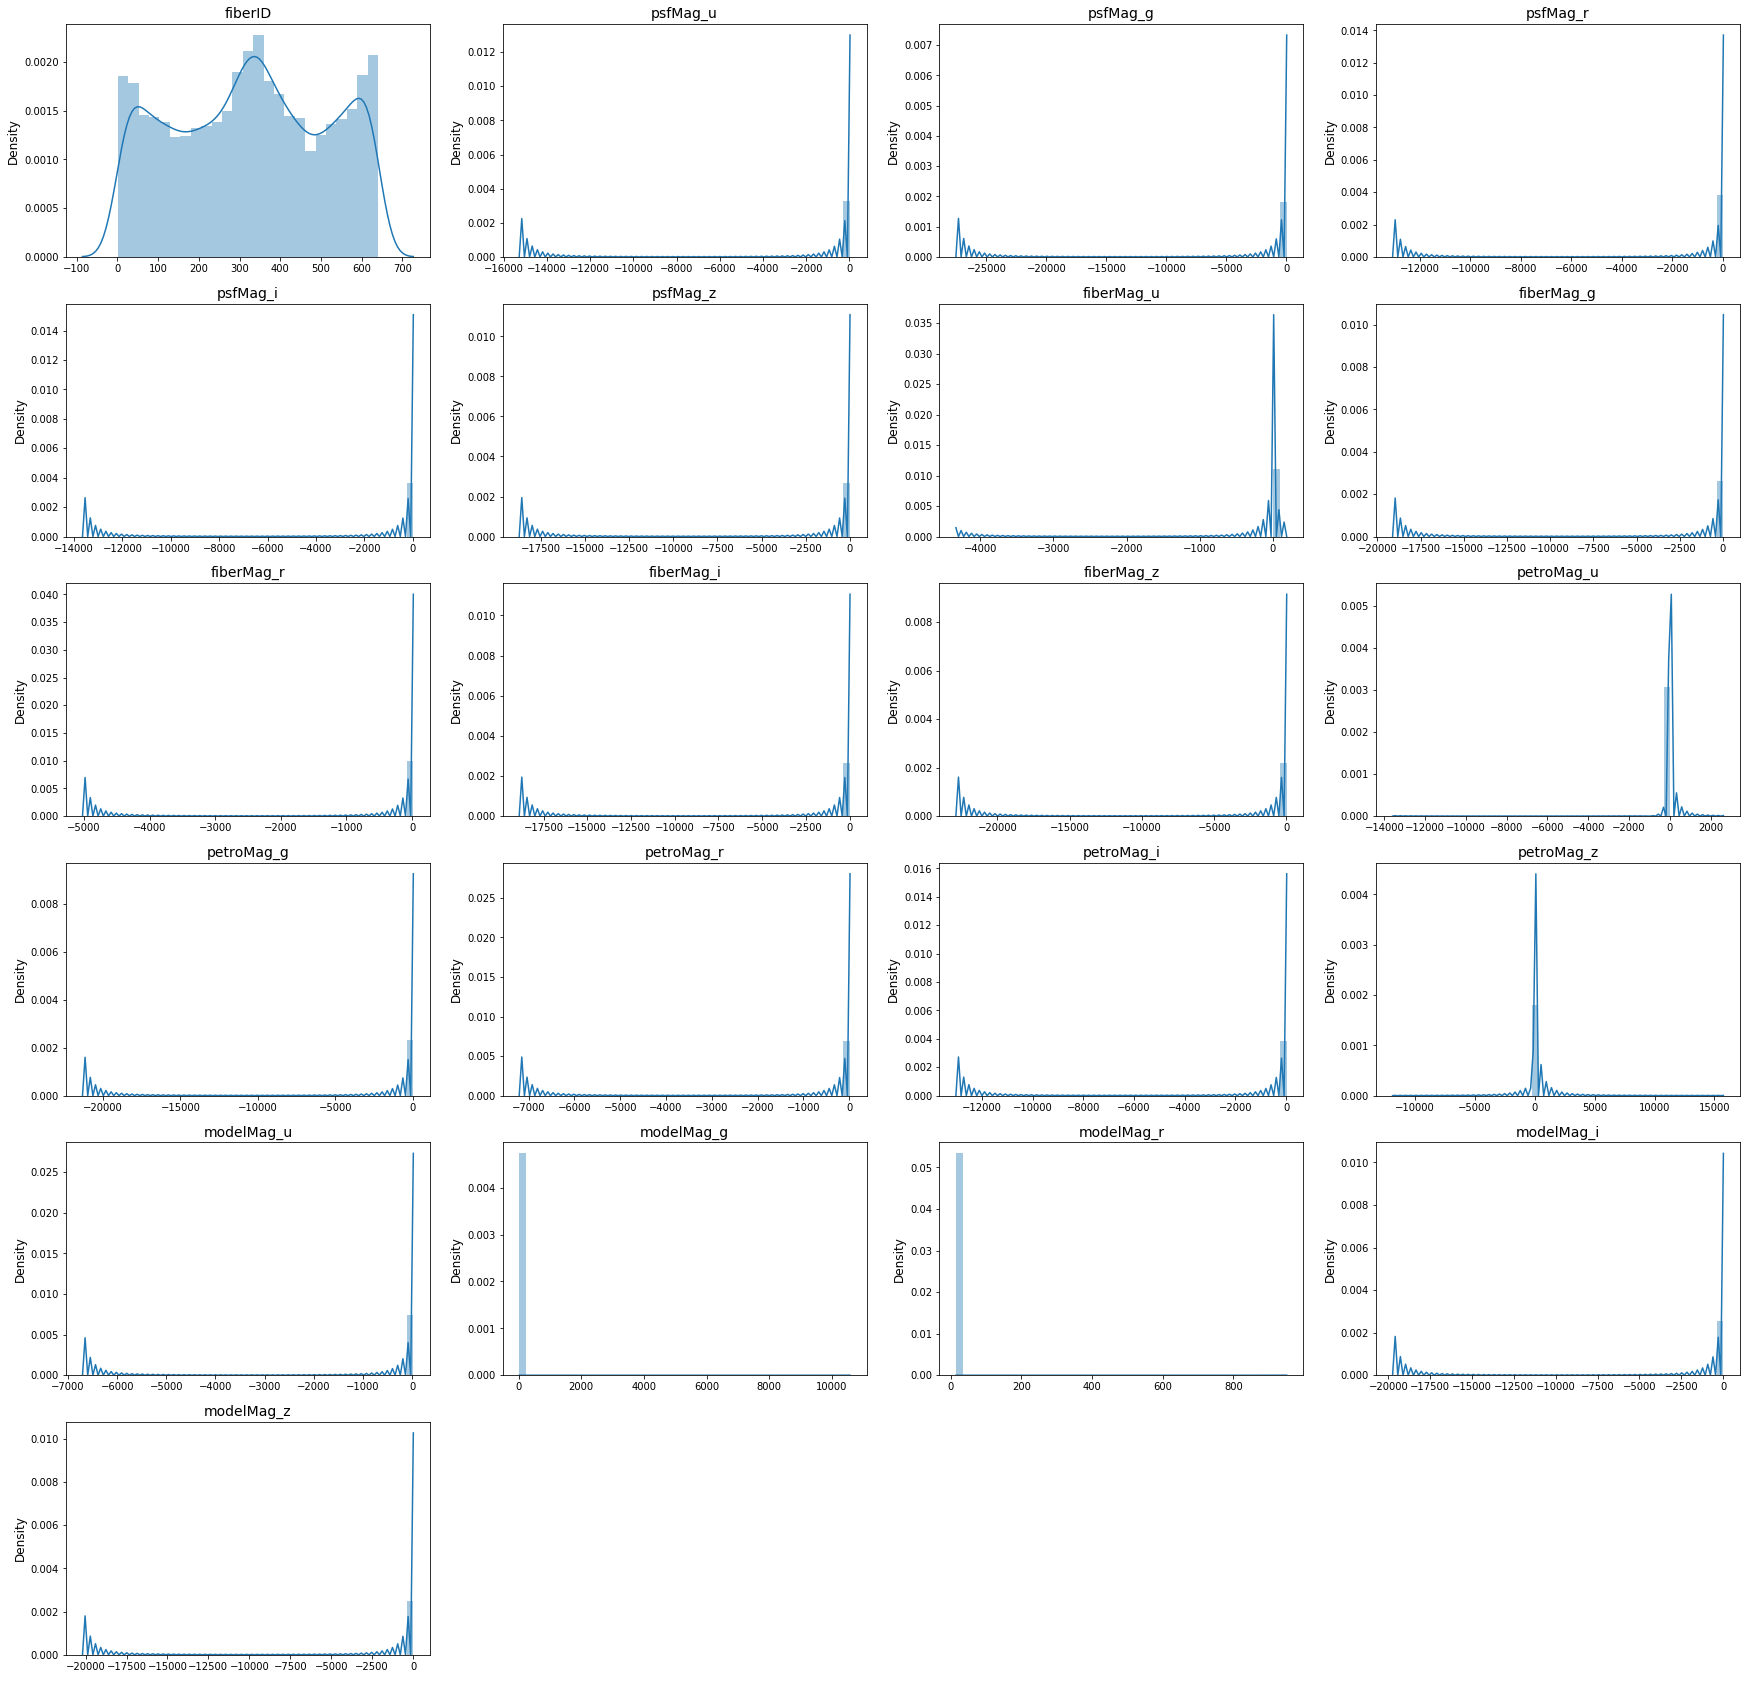

In [136]:
VisFeature(train_rt)

### ROSAT_STD
알 수 없음. TO-DO

In [138]:
train_rd = train.loc[train['type'] == 'ROSAT_D']
print("Num of ROSAT D Observation : {}".format(train_rd.shape[0]))
print("Pct of ROSAT D Observation : {}%".format(round(train_rd.shape[0] / train.shape[0] * 100,2)))

Num of ROSAT D Observation : 6580
Pct of ROSAT D Observation : 3.29%


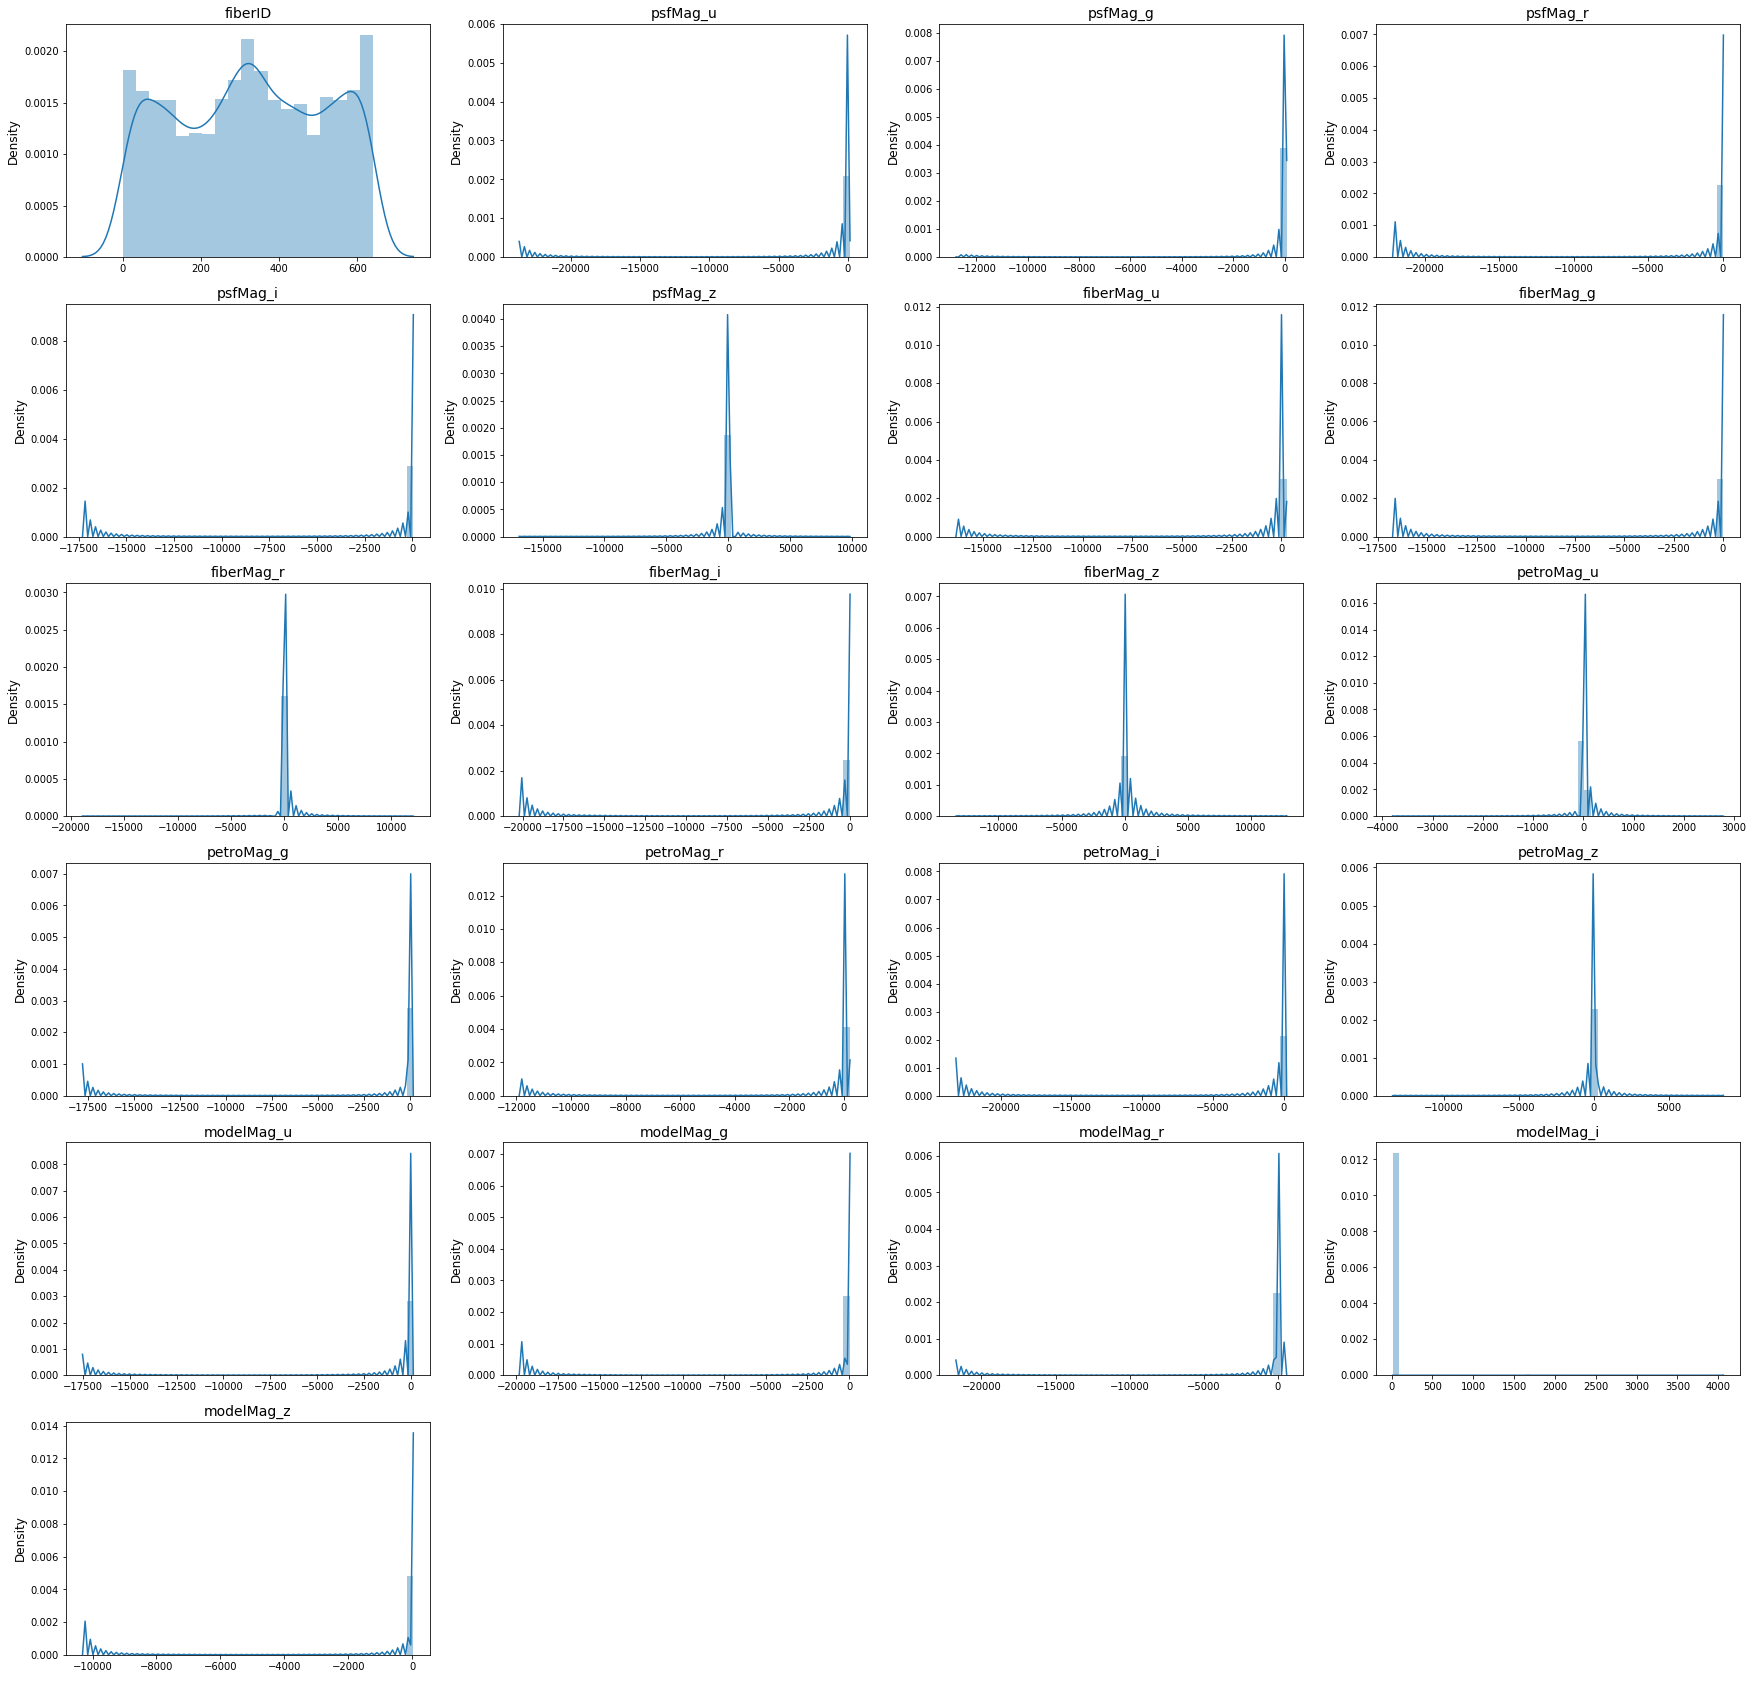

In [140]:
VisFeature(train_rd)

### STAR_WHITE_DWARF
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Sirius_A_and_B_Hubble_photo.jpg/330px-Sirius_A_and_B_Hubble_photo.jpg>

'백색왜성'이라고 불리며, 중간 이하의 질량을 지닌 항성이 행융합을 마치고 도달하는 천체이다.

상대적으로 가벼운 질량 때문에, 중심핵이 붕괴되어 온도와 압력이 상승하더라도 탄소 핵융합을 일으킬 만큼 충분한 온도에 도달하지 못한다. 

대부분 탄소와 산소로 이루어진 핵만이 남아있다.

더 이상 핵융합이 일어나지 않기 떄문에, 에너지를 생성할 수없다. 따라서 온도가 점차 낮아지며, 핵이 중력에 의해 붕괴하는 것을 막지 못하며, 매우 밀도가 높은 상태가 된다. 

매우 흔한 편이며, 전체 항성 가운데 6% 정도를 차지하고 있다.

In [143]:
train_swd = train.loc[train['type'] == 'STAR_WHITE_DWARF']
print("Num of White Dwarf Observation : {}".format(train_swd.shape[0]))
print("Pct of white Dwarf Observation : {}%".format(round(train_swd.shape[0] / train.shape[0] * 100,2)))

Num of White Dwarf Observation : 2160
Pct of white Dwarf Observation : 1.08%


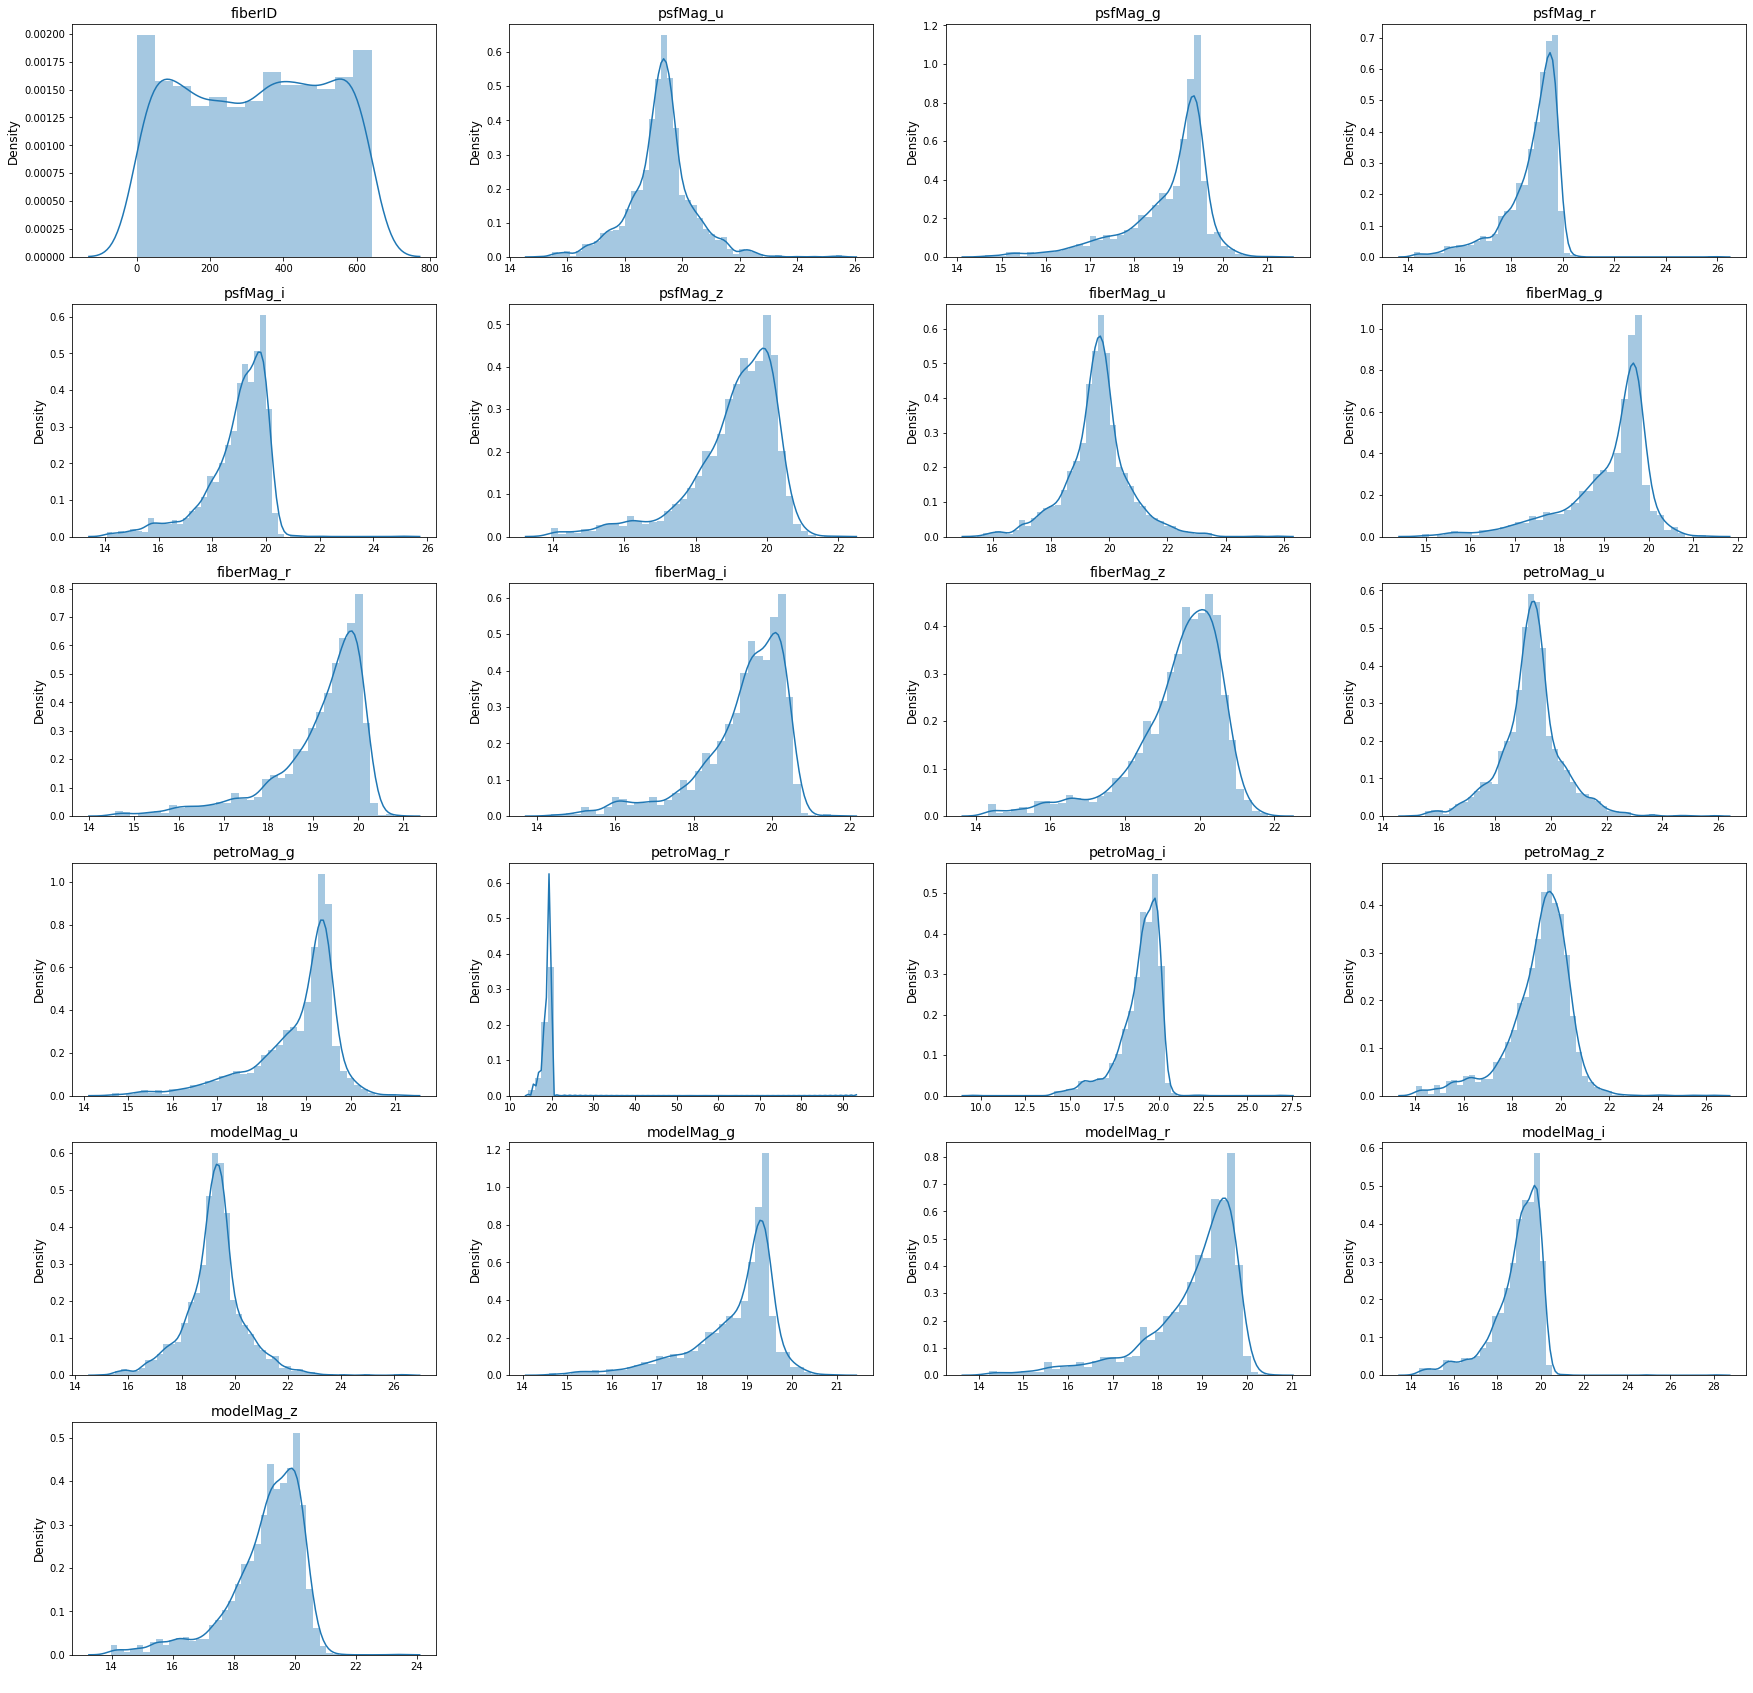

In [142]:
VisFeature(train_swd)

### SERENDIPITY_RED
알 수 없음. TO-DO

In [144]:
train_sr = train.loc[train['type'] == 'SERENDIPITY_RED']
print("Num of SERENDIPITY_RED Observation : {}".format(train_sr.shape[0]))
print("Pct of SERENDIPITY_RED Observation : {}%".format(round(train_sr.shape[0] / train.shape[0] * 100,2)))

Num of SERENDIPITY_RED Observation : 2562
Pct of SERENDIPITY_RED Observation : 1.28%


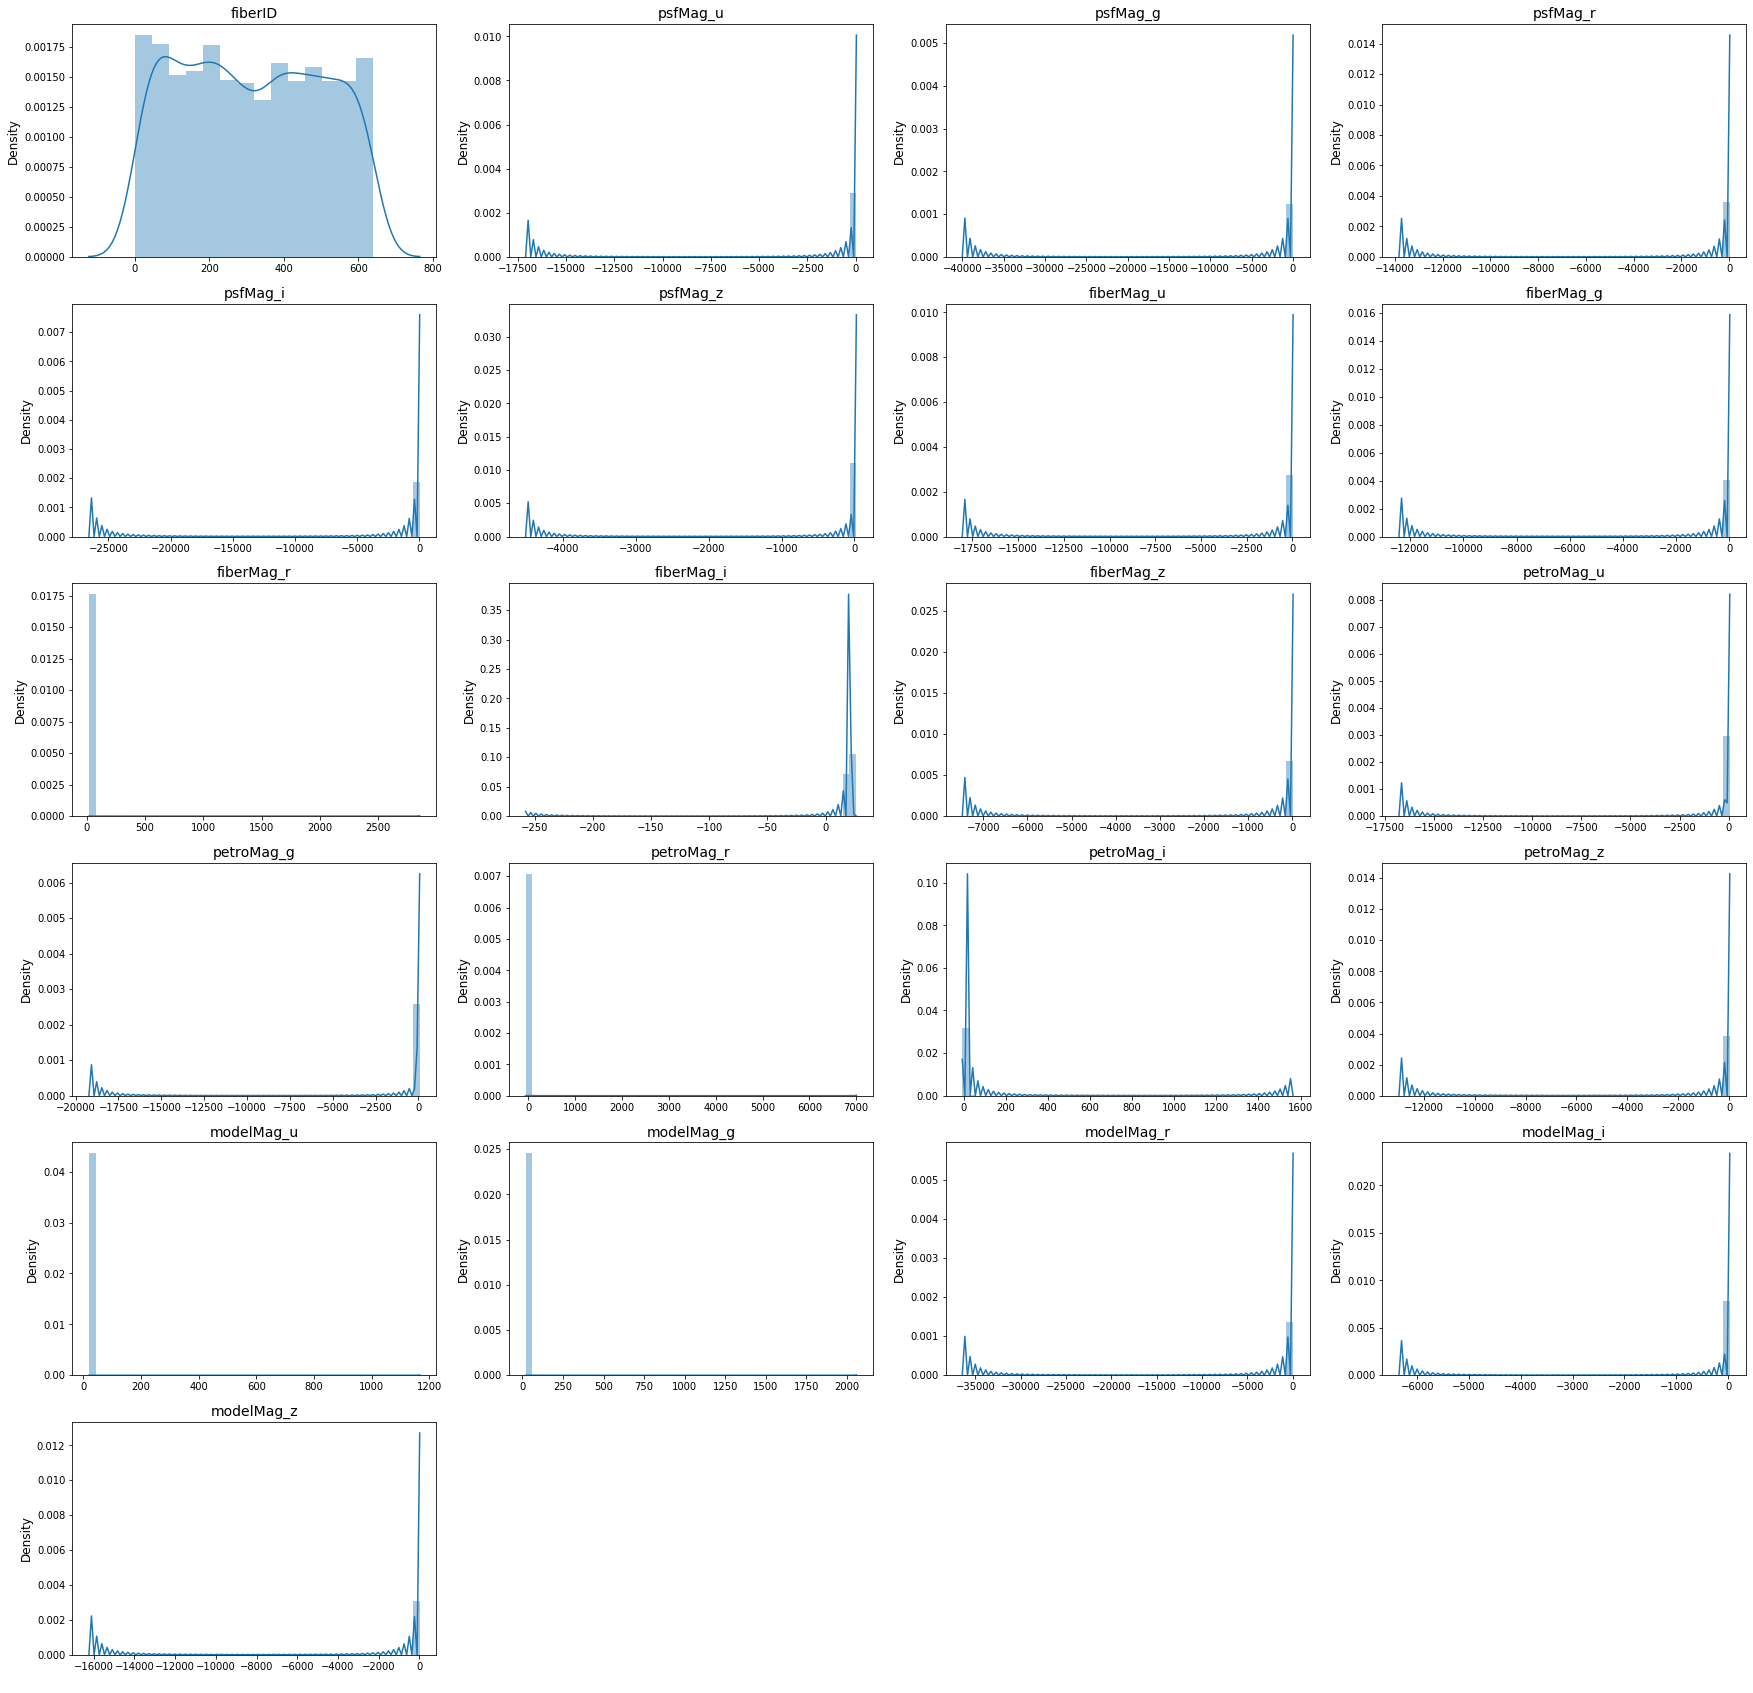

In [145]:
VisFeature(train_sr)

### STAR_CARBON

<img src=https://lh3.googleusercontent.com/proxy/iBjl-Kt0uR8HjiSm1sp6Zug9fD9rQkXAl2xBiAIslwwYB3J3-fhF4CctXnawvT_IeP2IcSV7ASysqfipmdEw55rvXZFa649PLCBnPFnjb9XOgO_tLgYEDwMqwLctK34 width="350">

대기에 산소보다 탄소를 더 많이 가지고 있는 별이다. 대표적인 예로 사냥개자리 Y가 존재한다.

In [146]:
train_sc = train.loc[train['type'] == 'STAR_CARBON']
print("Num of Star Carbon Observation : {}".format(train_sc.shape[0]))
print("Pct of Star Carbon Observation : {}%".format(round(train_sc.shape[0] / train.shape[0] * 100,2)))

Num of Star Cabon Observation : 3257
Pct of Star Cabon Observation : 1.63%


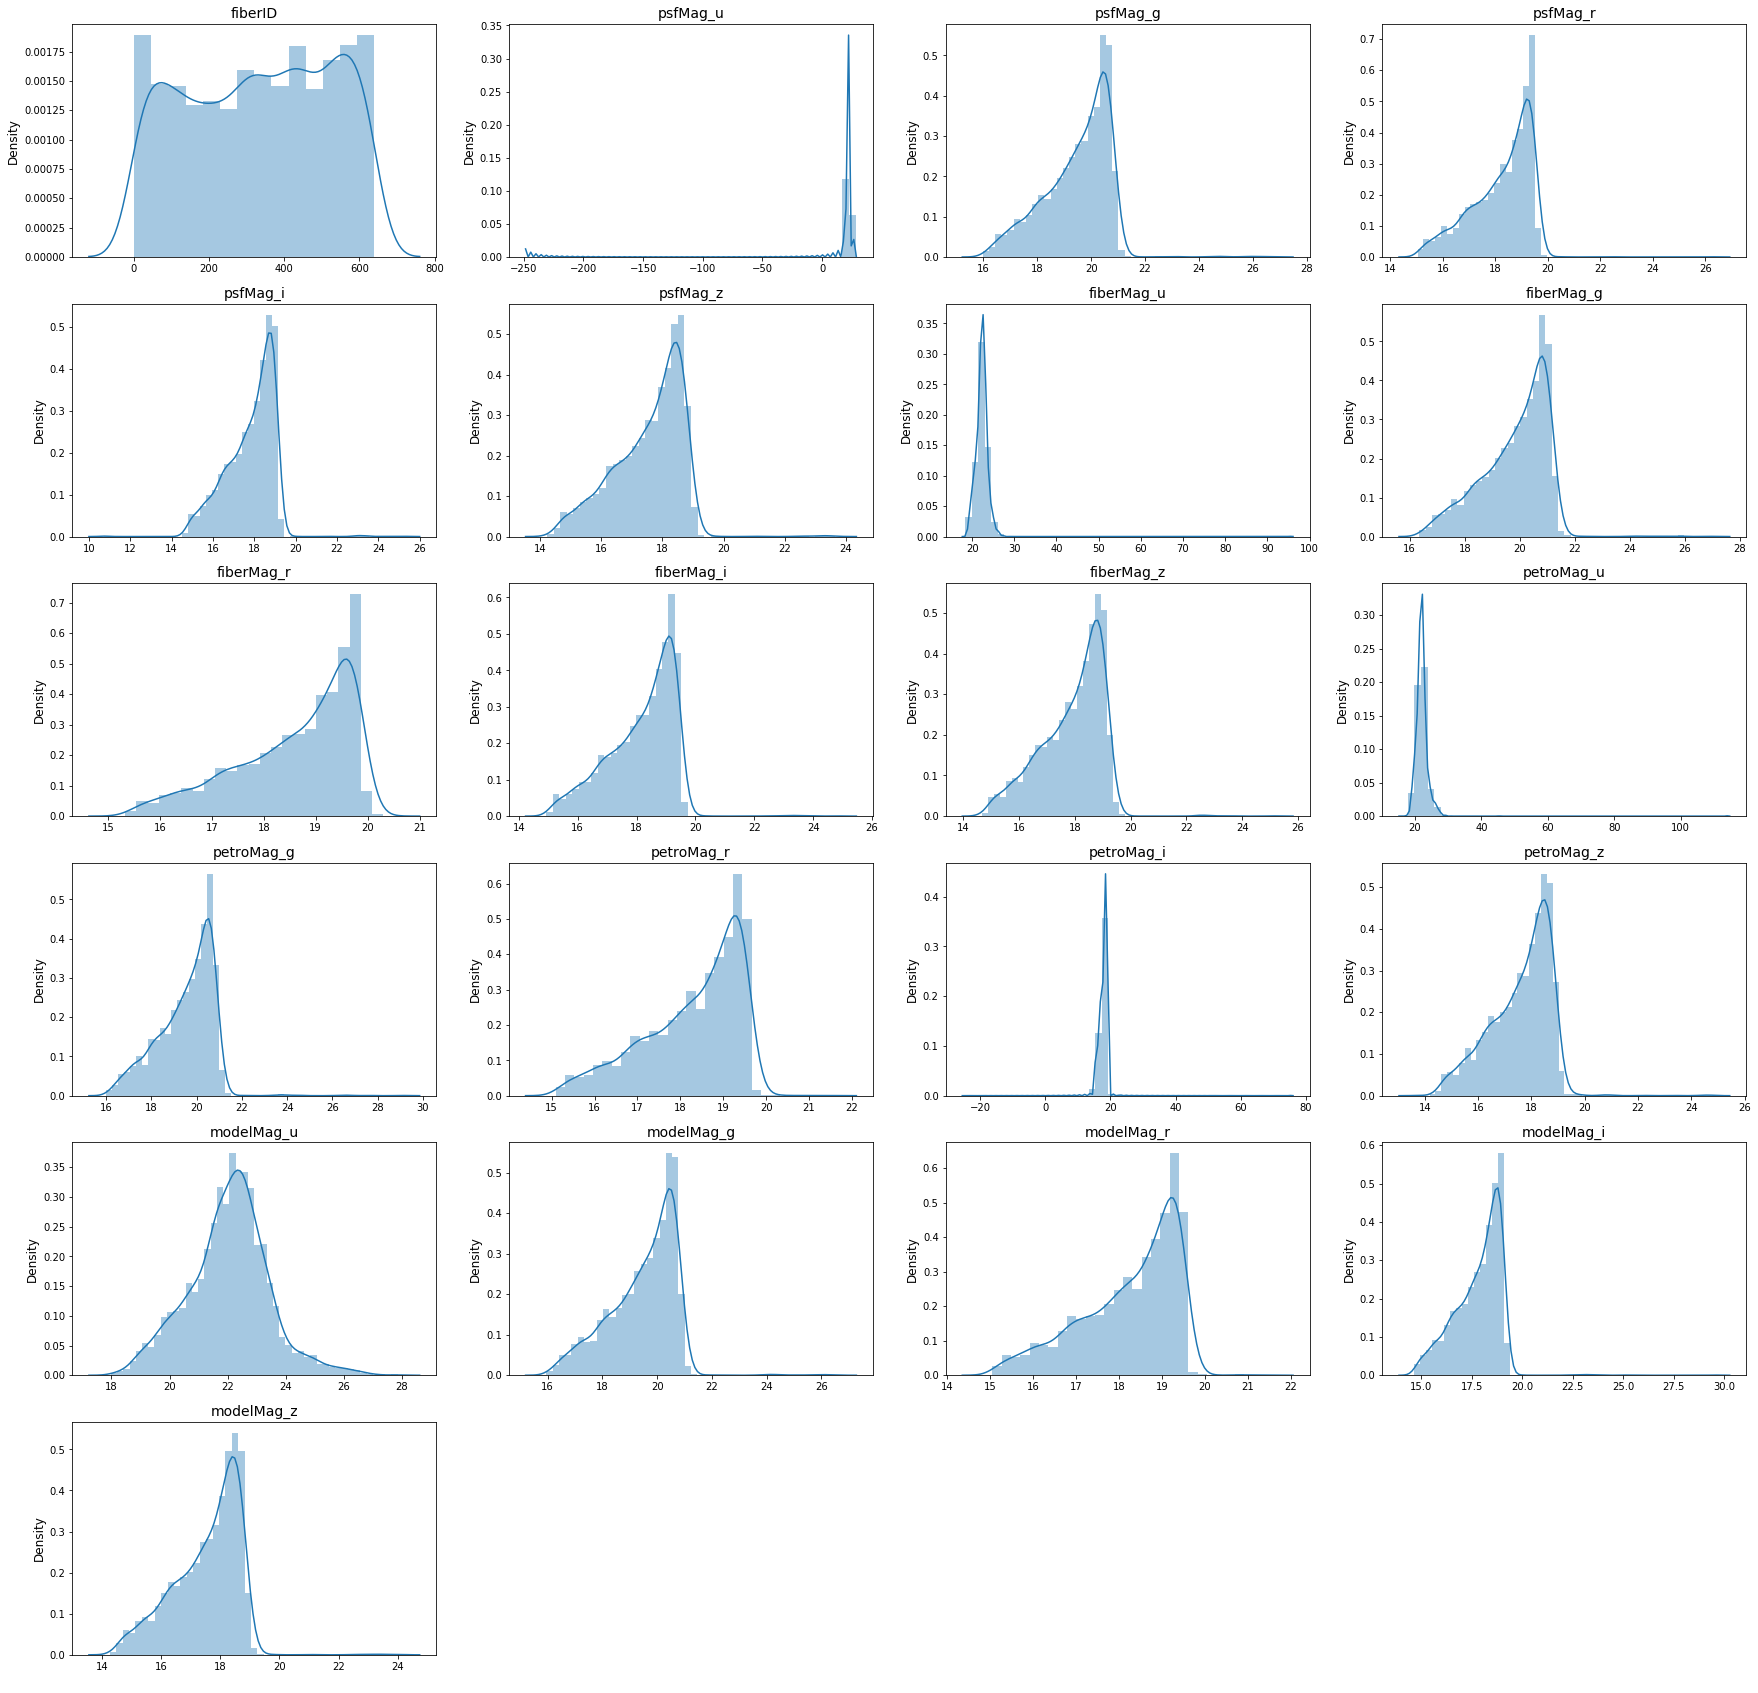

In [147]:
VisFeature(train_sc)

### SERENDIPITY_FIRST
알 수 없음. TO-DO

In [150]:
train_sf = train.loc[train['type'] == 'SERENDIPITY_FIRST']
print("Num of SERENDIPITY FIRST Observation : {}".format(train_sf.shape[0]))
print("Pct of SERENDIPITY FIRST Observation : {}%".format(round(train_sf.shape[0] / train.shape[0] * 100,2)))

Num of SERENDIPITY FIRST Observation : 7132
Pct of SERENDIPITY FIRST Observation : 3.57%


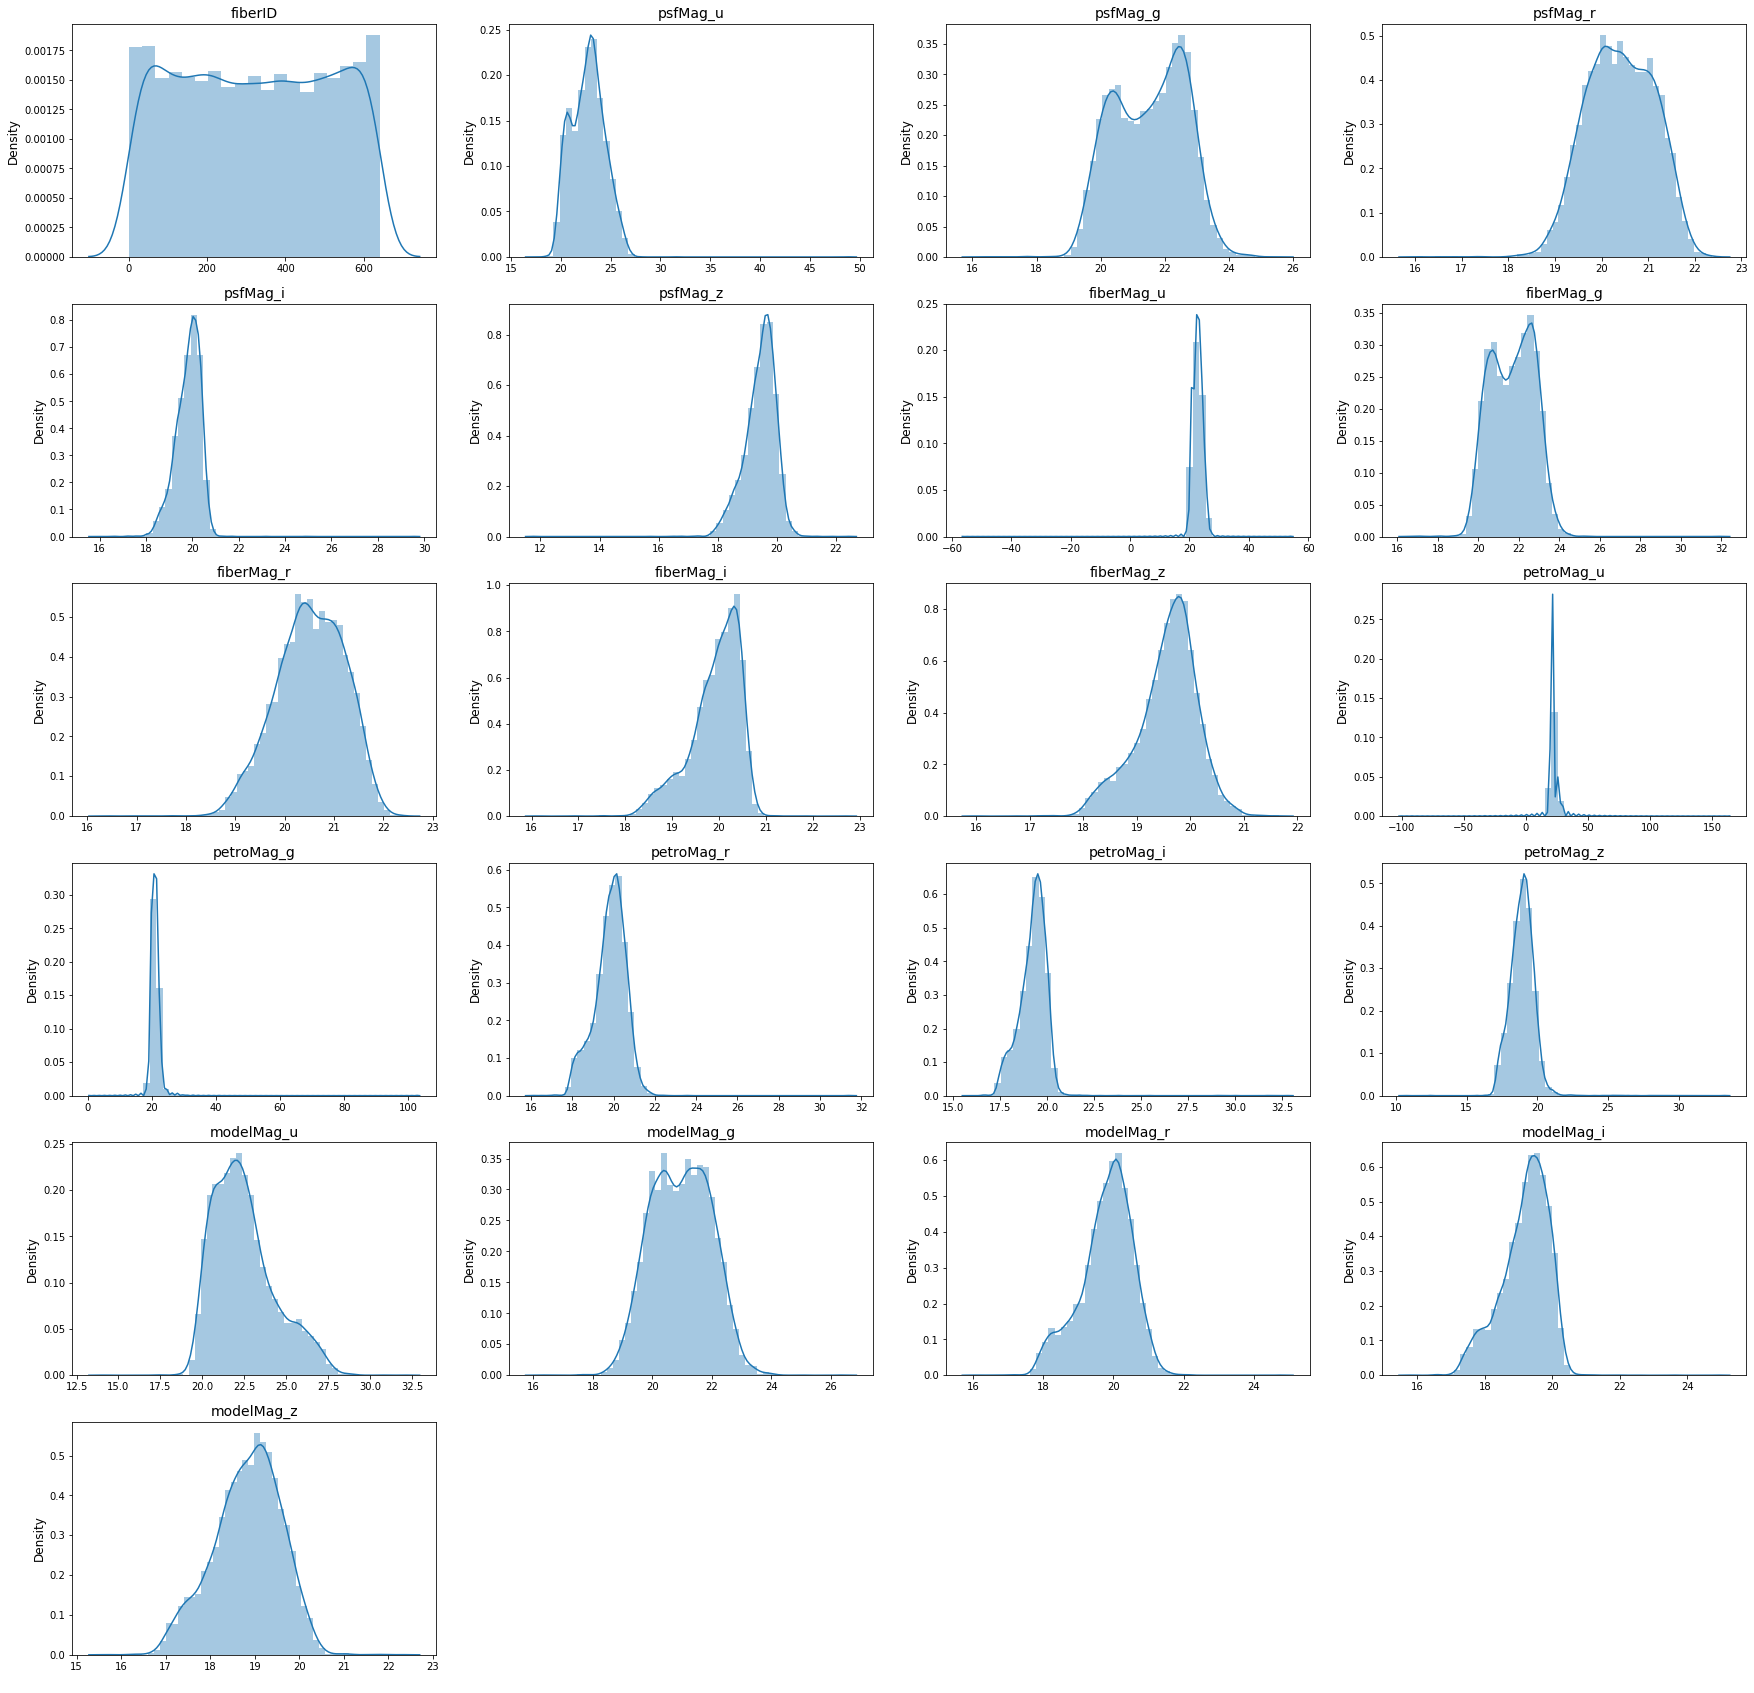

In [151]:
VisFeature(train_sf)

### STAR_BROWN_DWARF
<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Artist%E2%80%99s_conception_of_a_brown_dwarf_like_2MASSJ22282889-431026.jpg/413px-Artist%E2%80%99s_conception_of_a_brown_dwarf_like_2MASSJ22282889-431026.jpg>

'갈색왜성'으로 불리며, 제일 무거운 가스행성과 가장 가벼운 항성 사이 질량 범위에 존재하는 준항성천체이다. 

내부가 화학적으로 분화되거나 여러 층을 이루지 앟고, 전부 대류층으로 되어있을 것이라 추측된다.

질량이 작아서 중심핵에서 일반적인 헬륨으로 핵융합할 수 없다.  

분광형에 따라 색이 다르며, 육안으로 자홍색 또는 오랜지색, 빨간색으로 보인다. 그러나, 가시광선 파장대에서 밝게 보이지 않는다는 특징이 있다.

In [153]:
train_bd = train.loc[train['type'] == 'STAR_BROWN_DWARF']
print("Num of Brown Dwarf Observation : {}".format(train_bd.shape[0]))
print("Pct of Brown Dwarf FIRST Observation : {}%".format(round(train_bd.shape[0] / train.shape[0] * 100,2)))

Num of Brown Dwarf Observation : 500
Pct of Brown Dwarf FIRST Observation : 0.25%


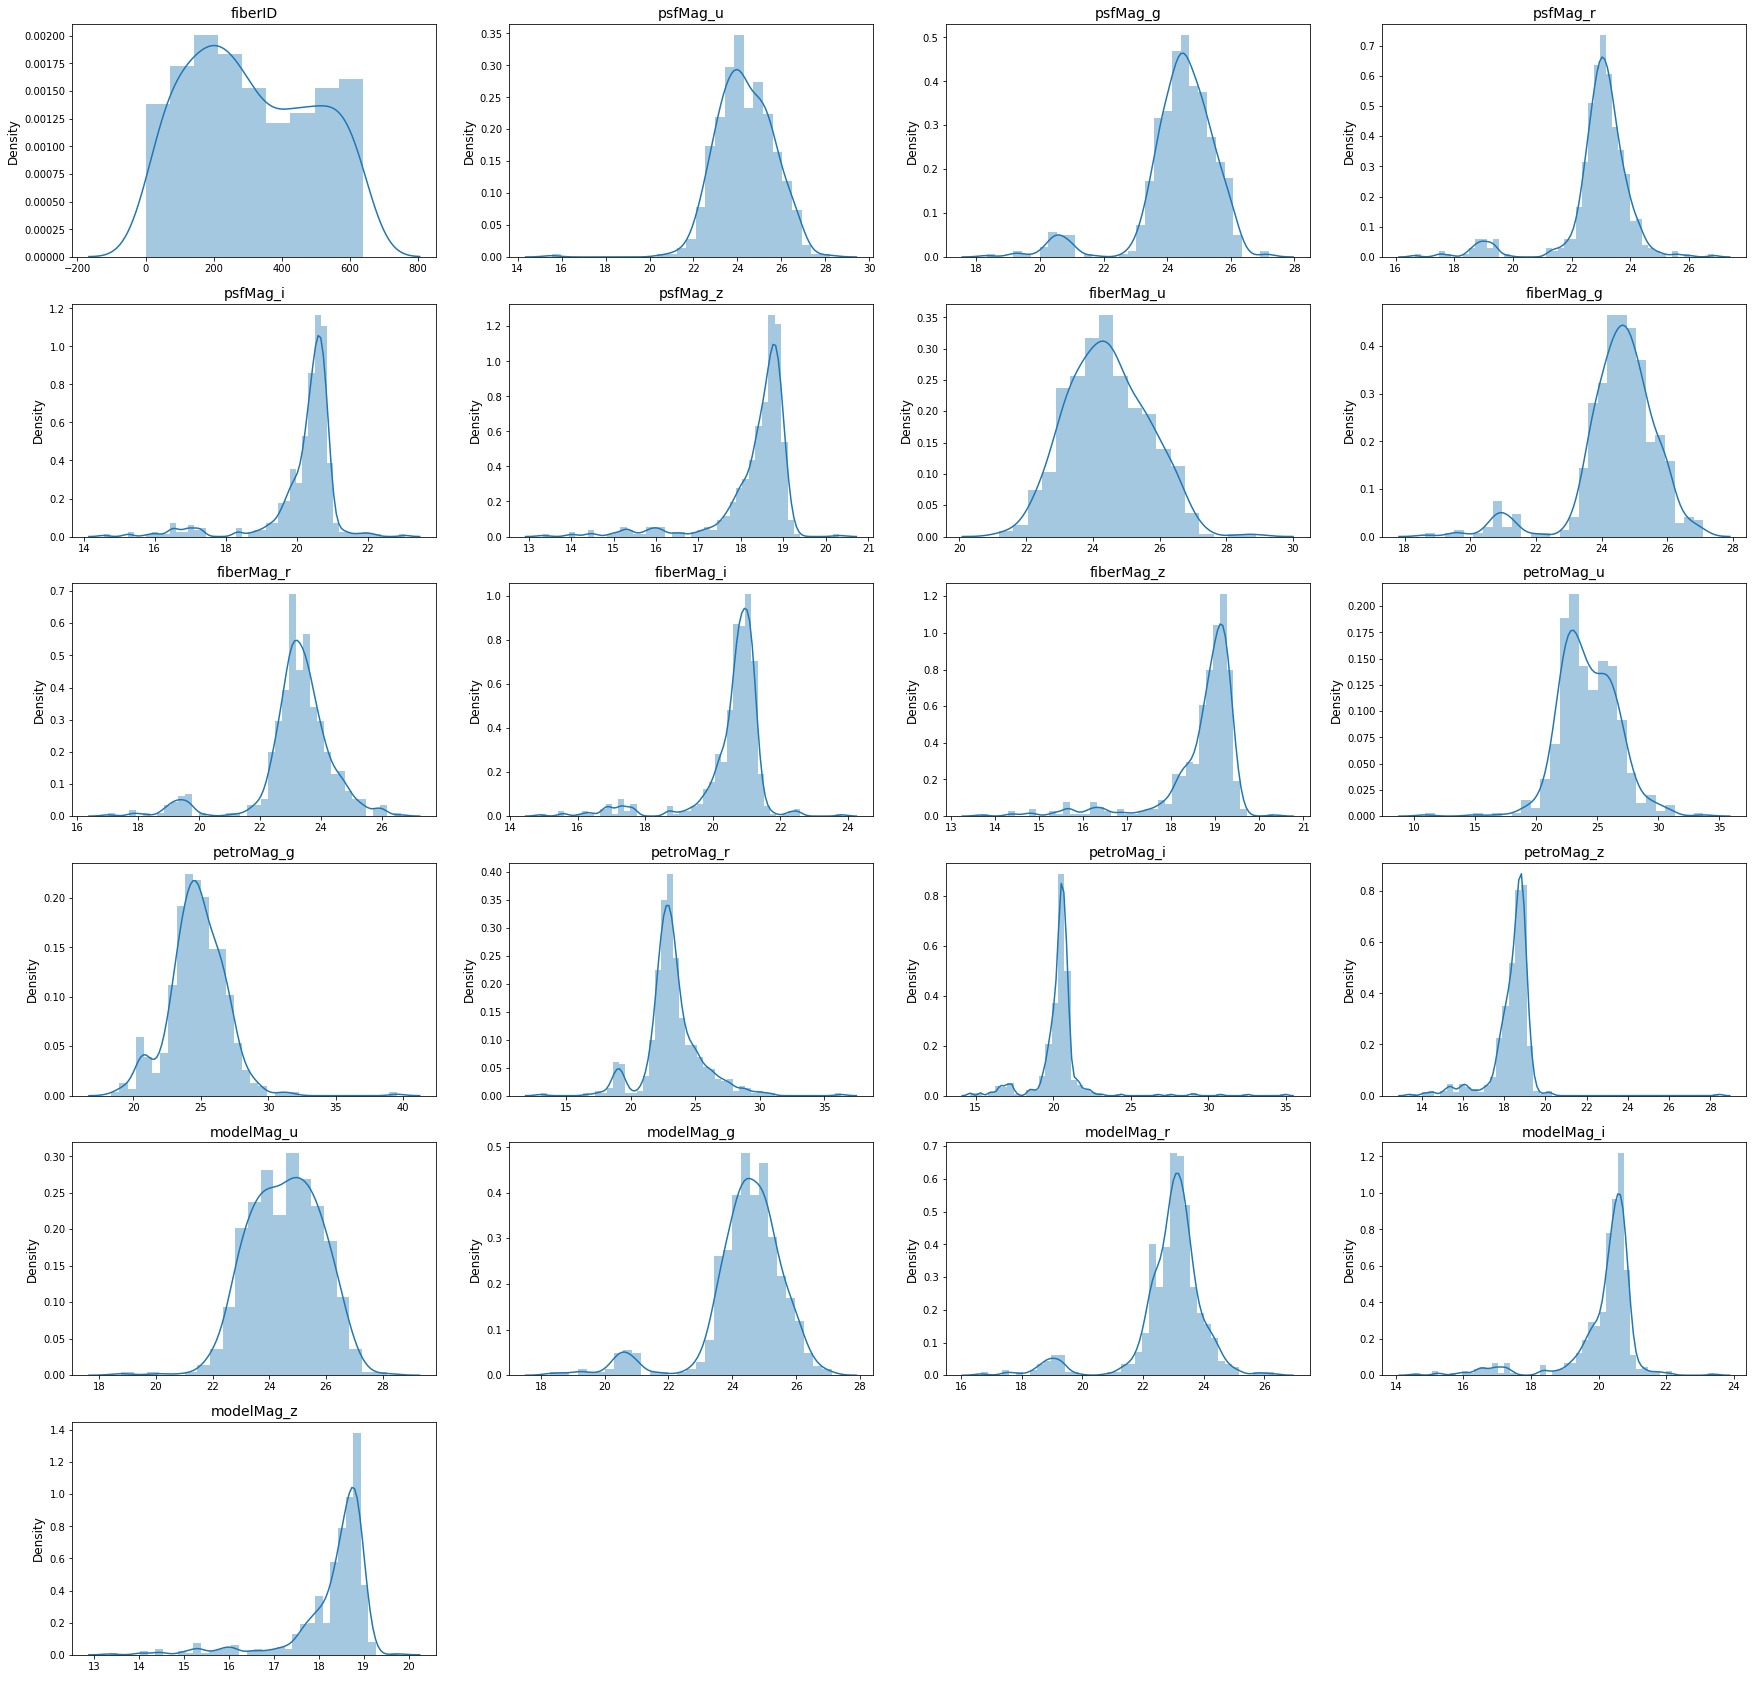

In [154]:
VisFeature(train_bd)

### STAR_SUB_DWARF

<img src=../image/image1.png width="450">

'준왜성'이라고 불리며, 같은 표면온도의 주계열성(왜성)에 비해 밝기가 1.5에서 2등급 정도 낮다는 특징을 보인다. 

In [155]:
train_ssd = train.loc[train['type'] == 'STAR_SUB_DWARF']
print("Num of Sub Dwarf Observation : {}".format(train_ssd.shape[0]))
print("Pct of Sub Dwarf FIRST Observation : {}%".format(round(train_ssd.shape[0] / train.shape[0] * 100,2)))

Num of Sub Dwarf Observation : 1154
Pct of Sub Dwarf FIRST Observation : 0.58%


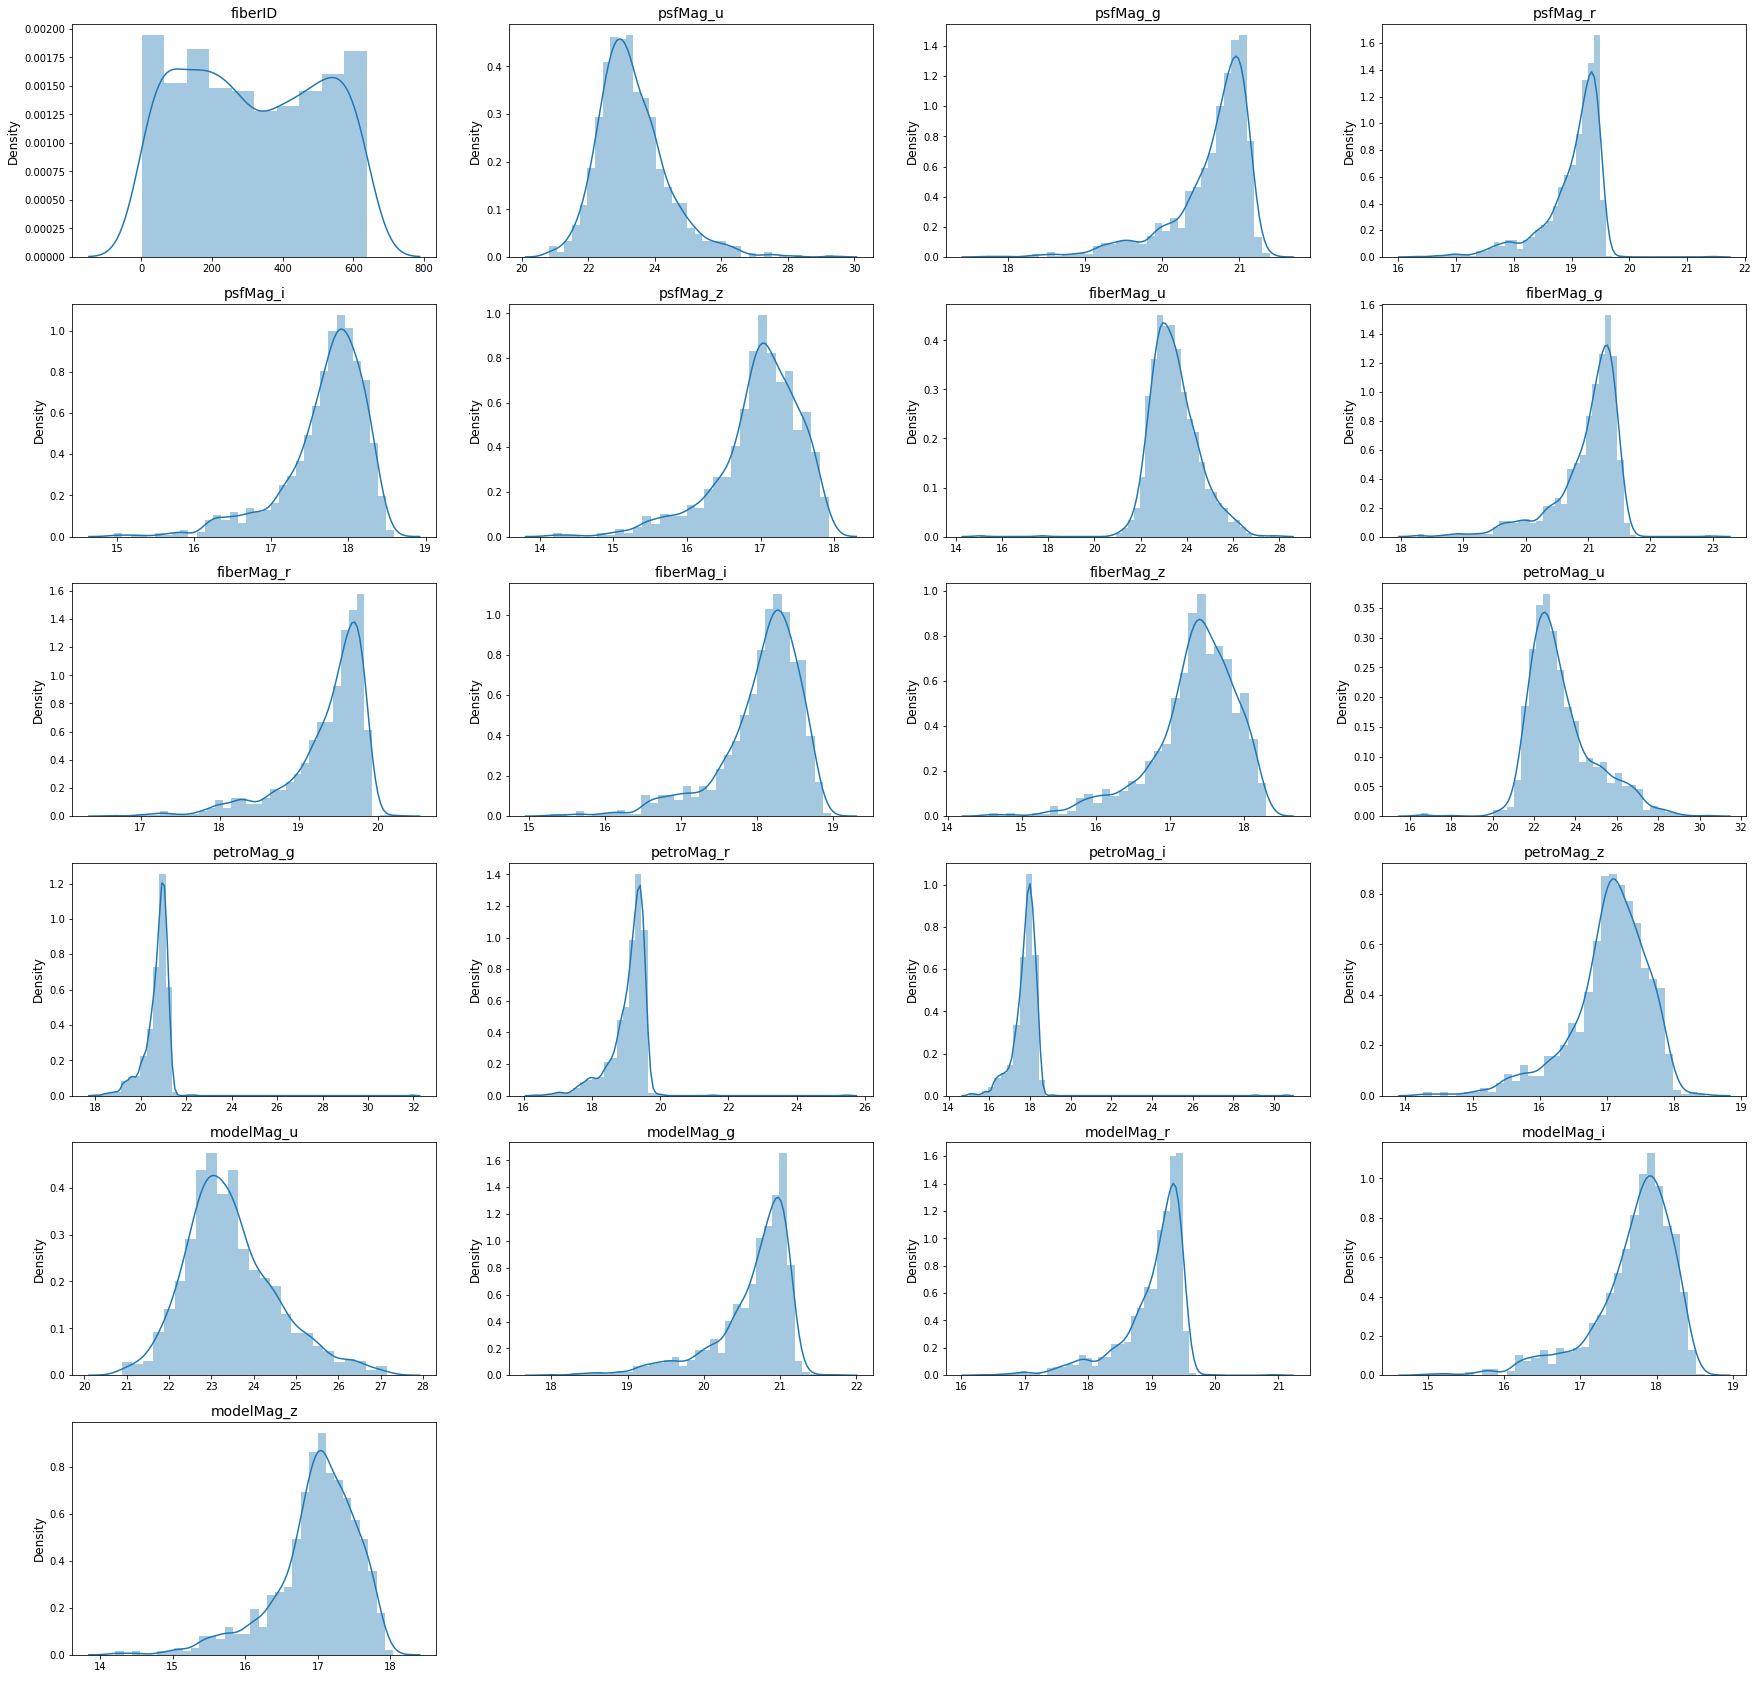

In [156]:
VisFeature(train_ssd)

### SKY

In [157]:
train_sky = train.loc[train['type'] == 'SKY']
print("Num of Sky Observation : {}".format(train_sky.shape[0]))
print("Pct of Sky FIRST Observation : {}%".format(round(train_sky.shape[0] / train.shape[0] * 100,2)))

Num of Sky Observation : 127
Pct of Sky FIRST Observation : 0.06%


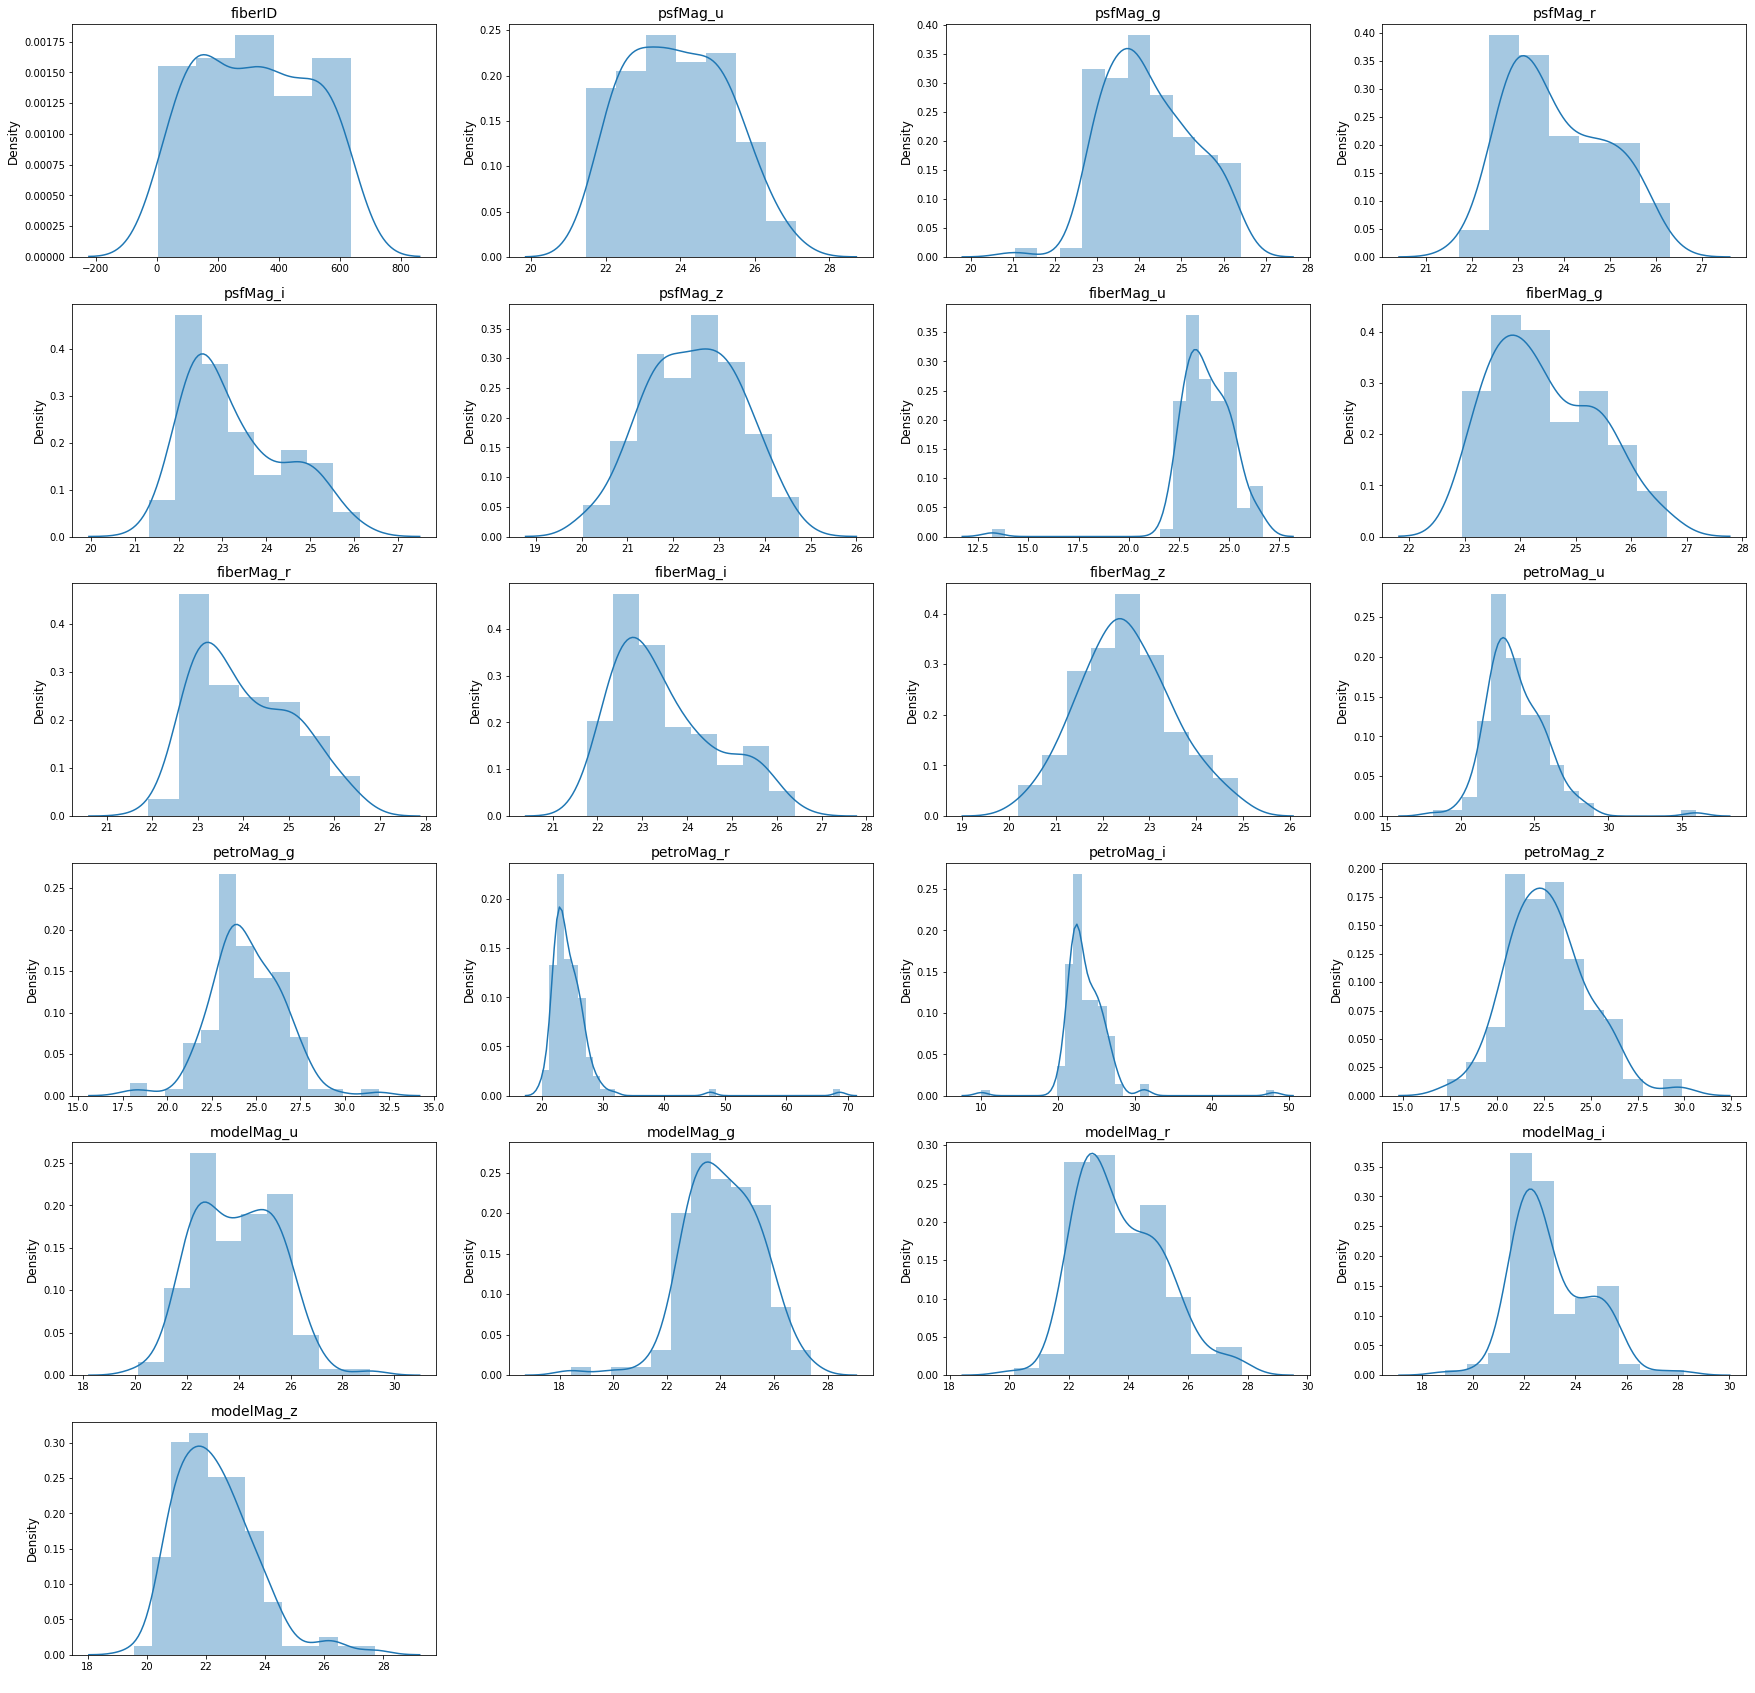

In [158]:
VisFeature(train_sky)

### SERENDIPITY_MANUAL
알 수 없음. TO-DO

In [159]:
train_sm = train.loc[train['type'] == 'SERENDIPITY_MANUAL']
print("Num of SERENDIPITY_MANUAL Observation : {}".format(train_sm.shape[0]))
print("Pct of SERENDIPITY_MANUAL Observation : {}%".format(round(train_sm.shape[0] / train.shape[0] * 100,2)))

Num of SERENDIPITY_MANUAL Observation : 61
Pct of SERENDIPITY_MANUAL Observation : 0.03%


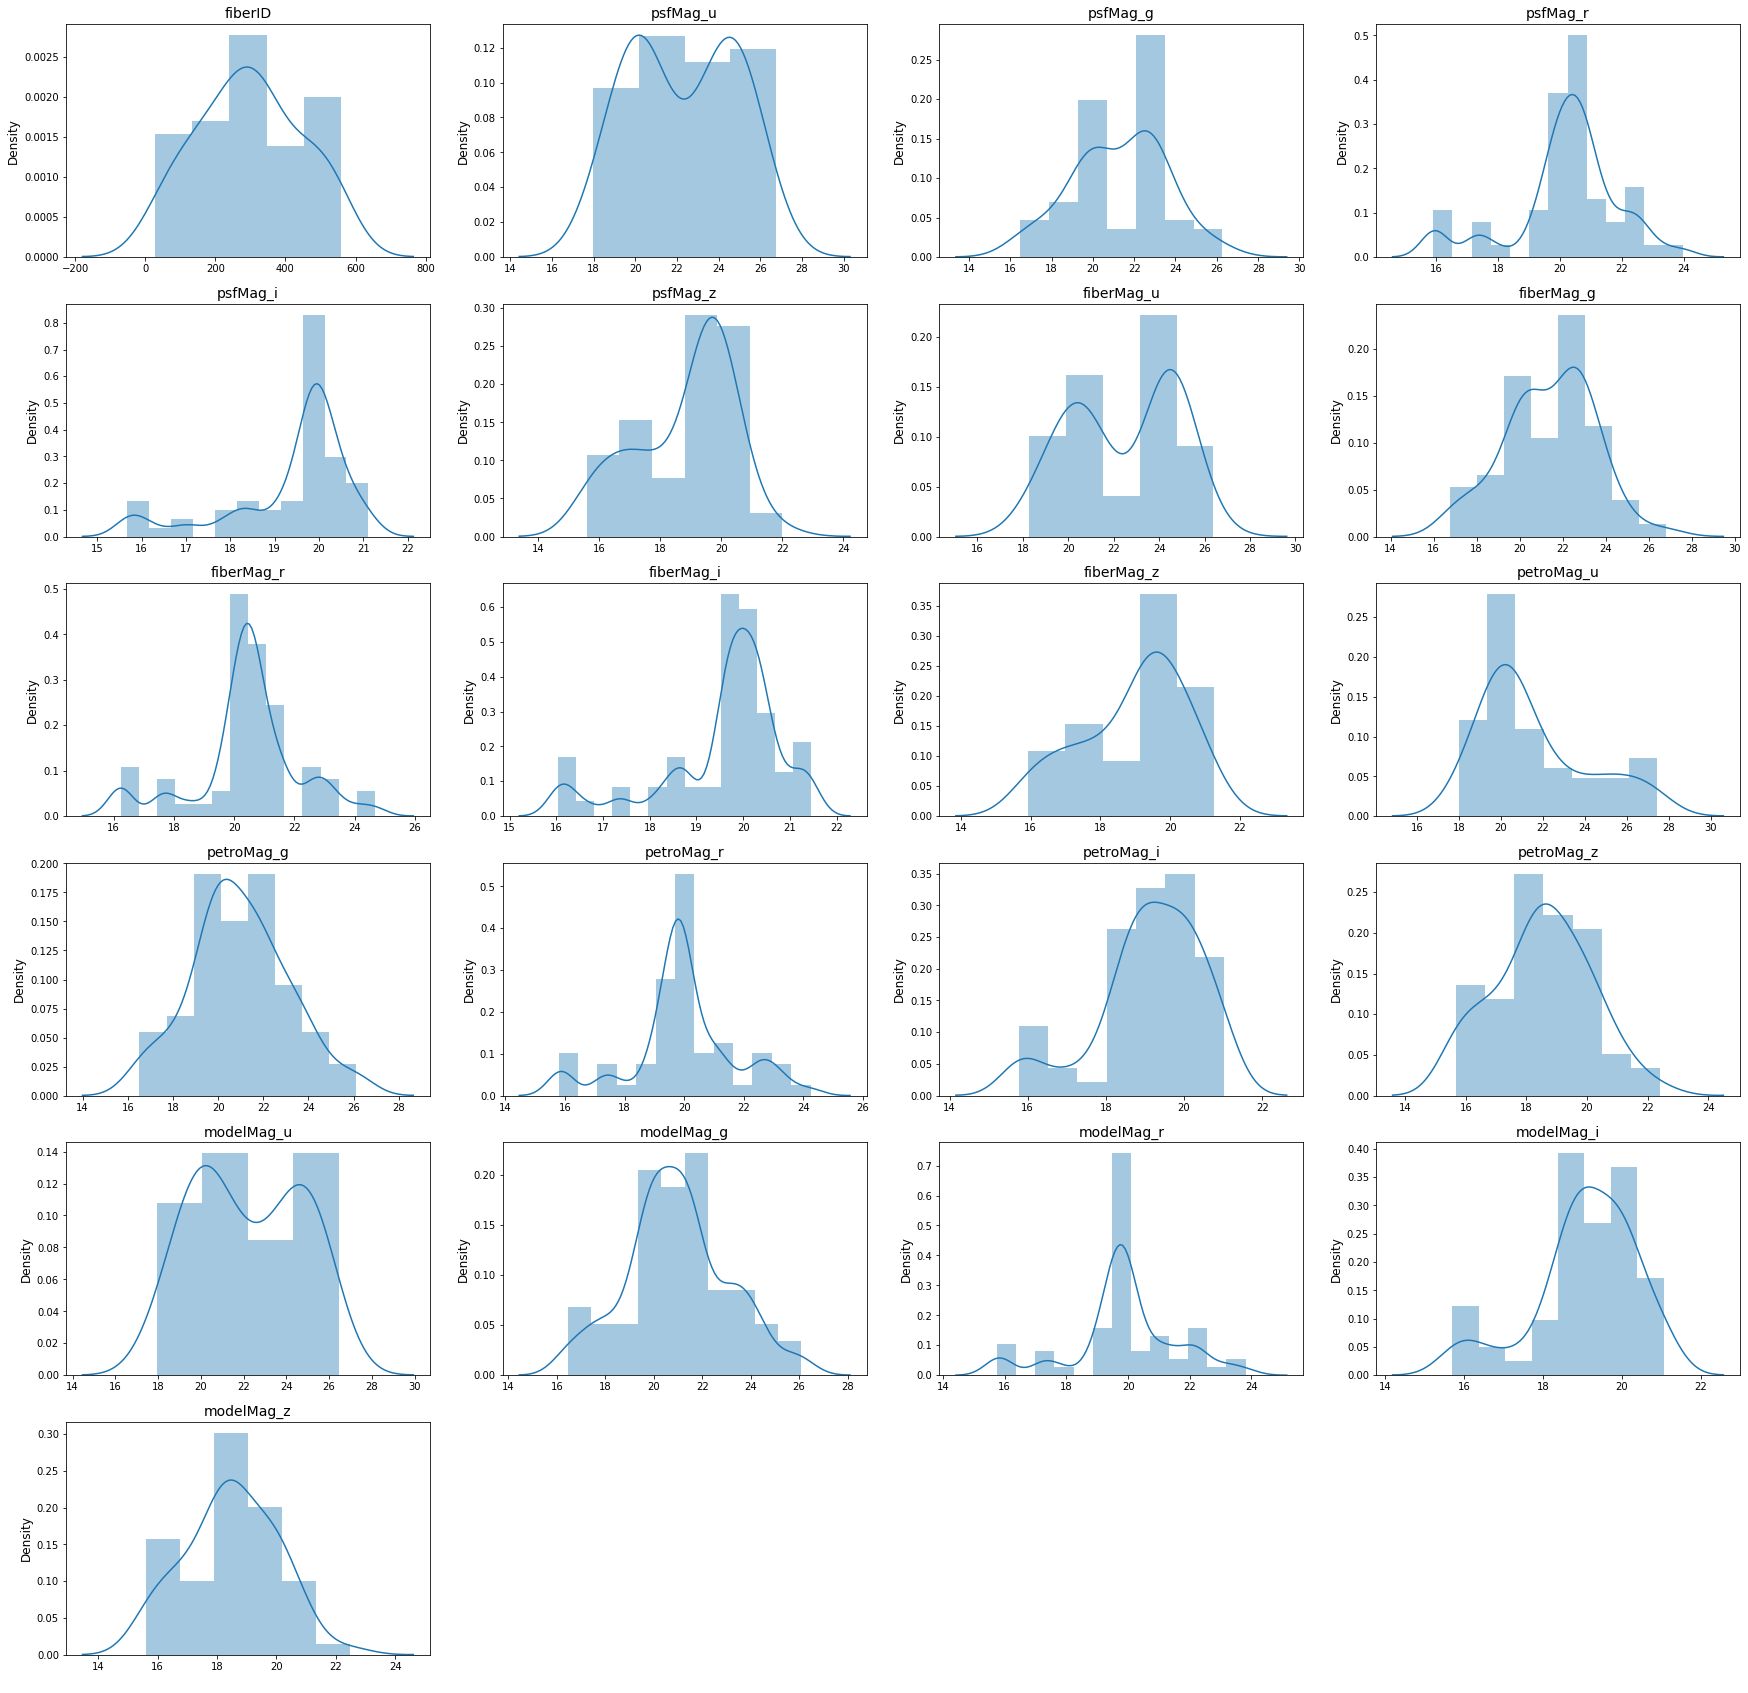

In [160]:
VisFeature(train_sm)

### STAR_PN
알 수 없음. TO-DO

In [161]:
train_sp = train.loc[train['type'] == 'STAR_PN']
print("Num of STAR_PN Observation : {}".format(train_sp.shape[0]))
print("Pct of STAR_PN Observation : {}%".format(round(train_sp.shape[0] / train.shape[0] * 100,2)))

Num of STAR_PN Observation : 13
Pct of STAR_PN Observation : 0.01%


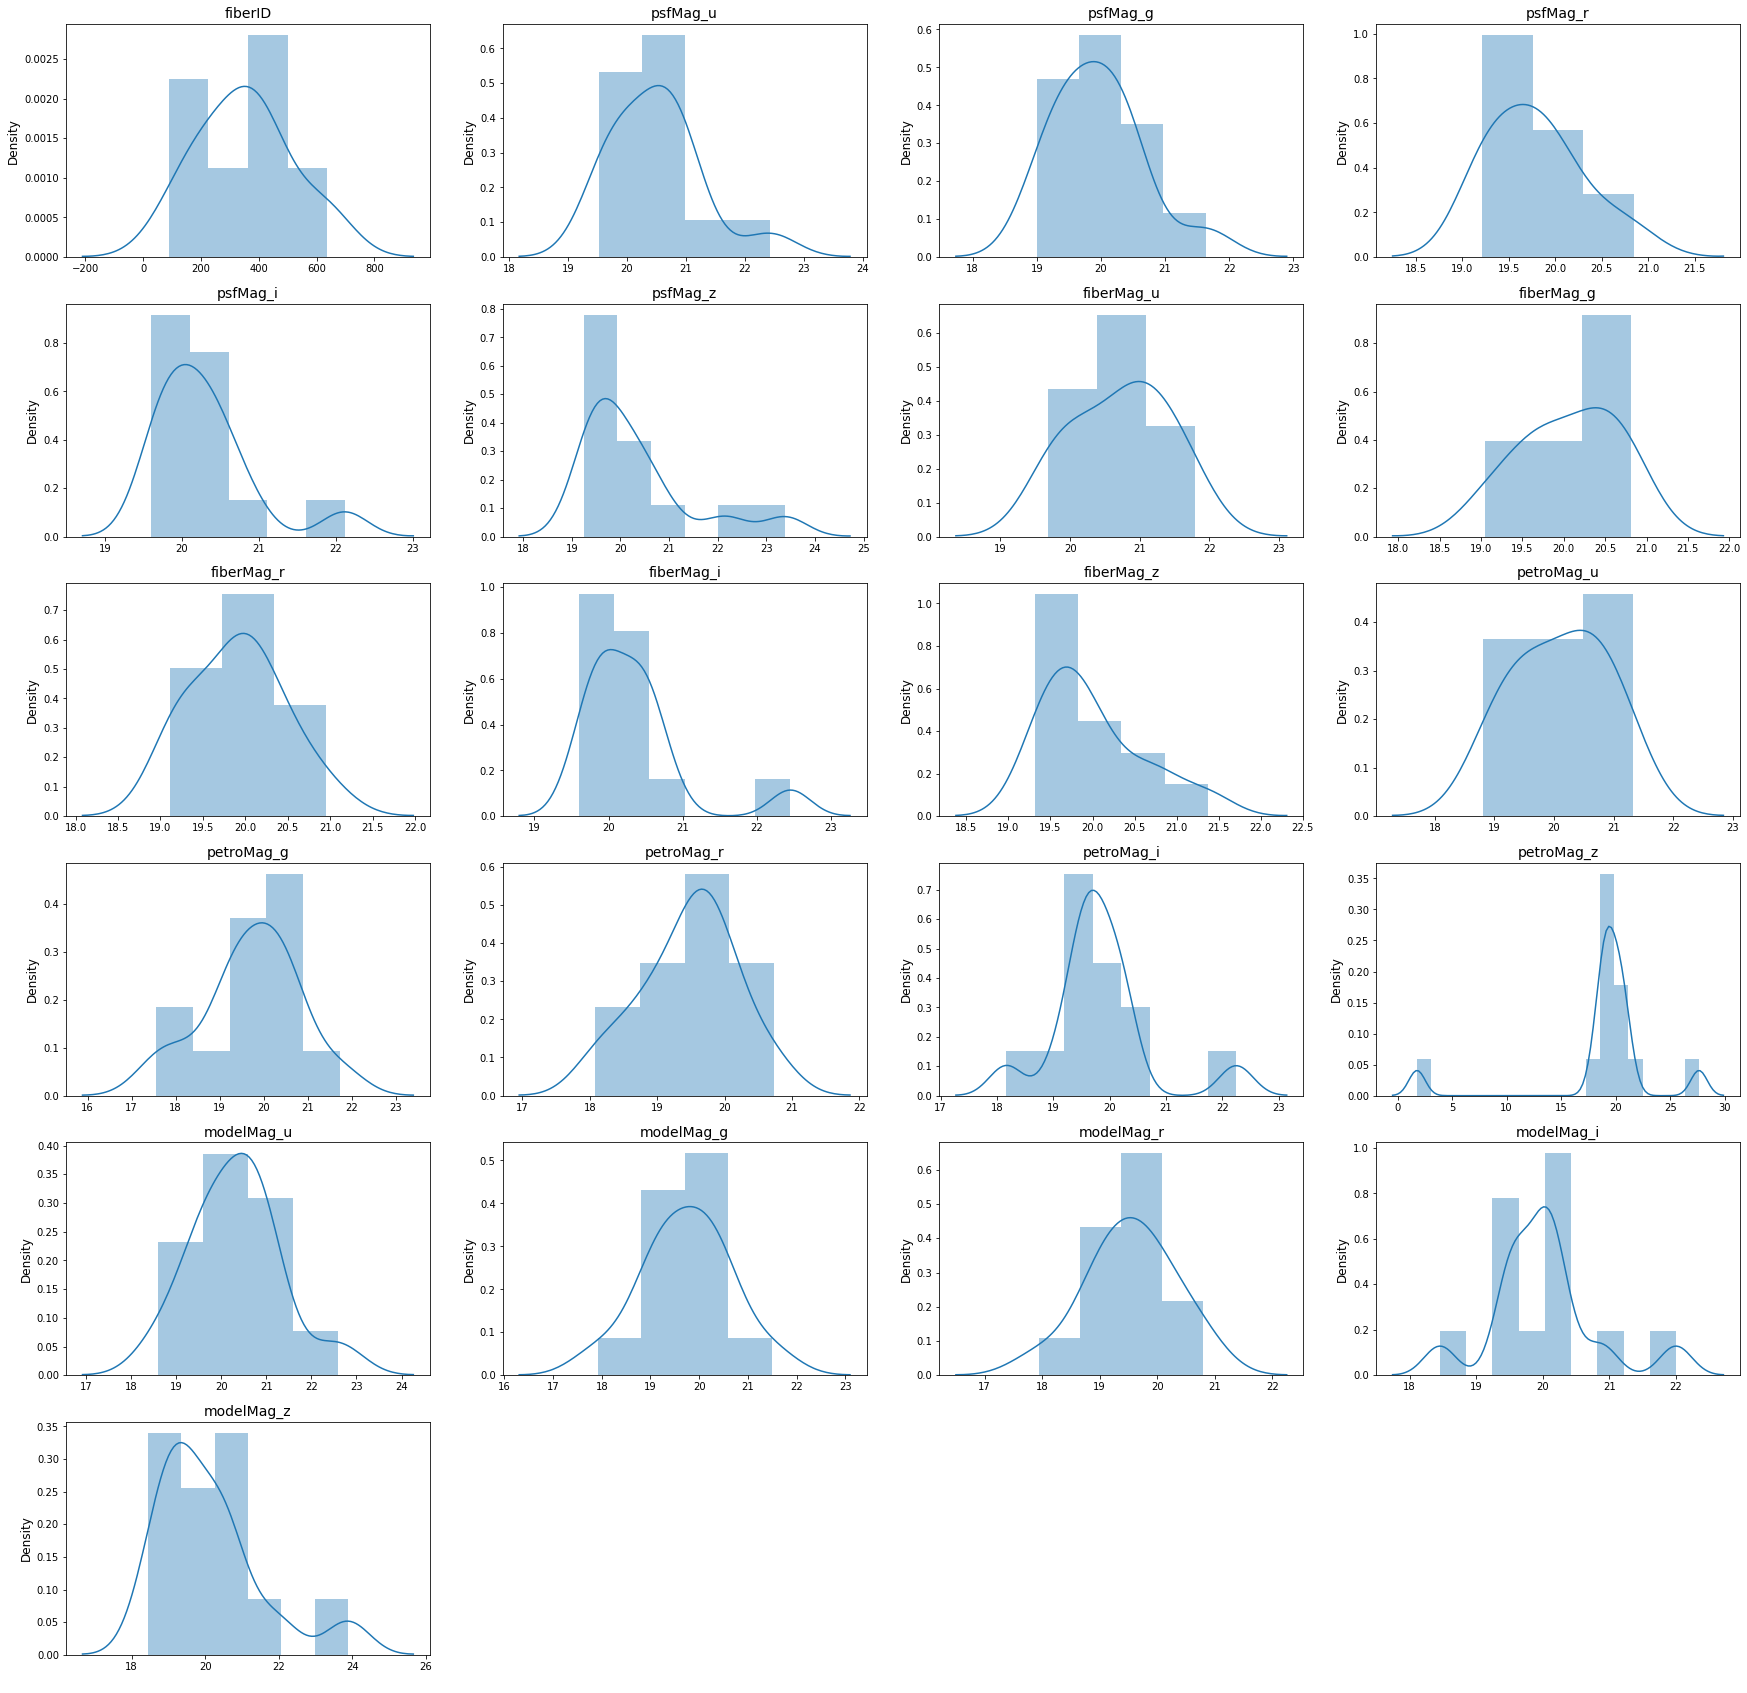

In [162]:
VisFeature(train_sp)